In [1]:
import sys
from pathlib import Path
import pandas as pd

# Notebook cell
%load_ext autoreload
%autoreload 2

# Get root directory (assuming notebook is in root/notebooks/)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR

# Add src directory to Python path
sys.path.append(str(ROOT_DIR / 'src'))

# Verify path
print(f"Python will look in these locations:\n{sys.path}")


# --- Execute the processor ---
import utils
from config import date_str, DOWNLOAD_DIR, DEST_DIR

path_data = f'..\data\{date_str}_df_finviz_merged.parquet'
path_corr = f'..\data\{date_str}_df_corr_emv_matrix.parquet'
path_cov = f'..\data\{date_str}_df_cov_emv_matrix.parquet'
path_output = f'..\picks\{date_str}_portf.txt'


print(utils.__file__)  # Should point to your src/utils.py
print(f'path_date: {path_data}')
print(f'path_corr: {path_corr}')
print(f'path_cov: {path_cov}')  
print(f'path_output: {path_output}')
print((f'date_str: {date_str}'))



Python will look in these locations:
['C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\python311.zip', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\DLLs', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\Lib', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv', '', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src']
c:\Users\ping\Files_win10\python\py311\stocks\src\utils.py
path_date: ..\data\2025-04-09_df_finviz_merged.parquet
path_corr: ..\data\2025-04-09_df_corr_emv_matrix.parquet
path_cov: ..\data\2025-04-09_df_cov_emv_matrix.parquet
path_output: ..\picks\2025-04-09_portf.txt

In [2]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
pd.set_option('display.width', 1000)        # Let the display adjust to the window
# pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 200)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [3]:
import pandas as pd

def get_column_values_above_threshold(df, column_name='Avg Volume, M', threshold=1):
  """
  Analyzes the number and percentage of values in a DataFrame column that are above a specified threshold,
  and returns the filtered DataFrame.

  Args:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze. Defaults to 'Avg Volume, M'.
    threshold (float): The threshold value to compare against. Defaults to 1.00.

  Returns:
    pd.DataFrame: A DataFrame containing only the rows where the specified column's value is above the threshold.
  """
  
  count_before = len(df)
  above_threshold_df = df[df[column_name] > threshold]
  count_after = len(above_threshold_df)
  percentage = (count_after / len(df)) * 100

  print(f"count_before: {count_before}")
  print(f"count_after above threshold ({threshold}): {count_after}")
  print(f"Percentage above threshold ({threshold}): {percentage:.2f}%")

  return above_threshold_df


In [4]:
df_data = pd.read_parquet(path_data)

# liquidity filter, Avg Volume, M > 0.75M
df_data = get_column_values_above_threshold(df_data, column_name='Avg Volume, M', threshold=0.75)

# Drop specified columns with NaNs in df_data
df_data = df_data.drop(['All-Time High %', 'All-Time Low %', 'Dividend %'], axis=1)

df_corr = pd.read_parquet(path_corr)
df_cov = pd.read_parquet(path_cov)

print(f'\ndf_cov.shape: {df_cov.shape}')
display(df_cov.head())

print(f'\ndf_corr.shape: {df_corr.shape}')
display(df_corr.head())

print(f'\ndf_data.shape: {df_data.shape}')
display(df_data.head())
display((df_data.describe()))

count_before: 1536
count_after above threshold (0.75): 1180
Percentage above threshold (0.75): 76.82%

df_cov.shape: (1536, 1536)


Symbol      A     AA    AAL   AAON   AAPL   ABBV   ABEV   ABNB    ABT   ACGL    ACI   ACIW    ACM    ACN   ACWI   ACWV   ACWX   ADBE    ADC    ADI    ADM    ADP   ADSK    ADT    AEE    AEG    AEM    AEP    AER    AES    AFG    AFL   AFRM   AGCO     AGG    AGI   AGNC    AIG    AIT    AIZ    AJG   AKAM   ALAB    ALB    ALC   ALGN    ALK    ALL   ALLE   ALLY   ALNY   ALSN    ALV     AM   AMAT   AMCR    AMD    AME   AMGN    AMH   AMLP    AMP    AMT    AMX   AMZN     AN   ANET   ANSS    AON    AOS    APA    APD    APG    APH    APO    APP   APPF   APTV     AR   ARCC    ARE   ARES   ARGX   ARKB   ARKK    ARM   ARMK     AS   ASML   ASND    ASR   ASTS    ASX    ATI    ATO    ATR     AU    AUR    AVB   AVDE   AVDV   AVEM   AVGO   AVLV   AVTR   AVUS   AVUV    AVY    AWI     AWK   AXON    AXP    AXS   AXTA    AYI   AZEK    AZN    AZO     BA   BABA    BAC    BAH   BALL    BAM    BAP    BAX   BBAX   BBCA    BBD   BBEU   BBIN   BBIO   BBJP   BBUS   BBVA   BBWI    BBY     BCE    BCH    BCS    BDX  \
Symbol                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
A      0.0011 0.0020 0.0022 0.0015 0.0017 0.0006 0.0007 0.0015 0.0004 0.0007 0.0002 0.0013 0.0009 0.0009 0.0010 0.0005 0.0008 0.0009 0.0003 0.0021 0.0008 0.0007 0.0011 0.0007 0.0003 0.0011 0.0007 0.0002 0.0010 0.0012 0.0007 0.0007 0.0026 0.0015 -0.0000 0.0009 0.0005 0.0008 0.0013 0.0009 0.0005 0.0013 0.0022 0.0024 0.0010 0.0015 0.0023 0.0006 0.0006 0.0012 0.0012 0.0011 0.0011 0.0006 0.0018 0.0007 0.0024 0.0009 0.0005 0.0008 0.0007 0.0013 0.0002 0.0005 0.0014 0.0011 0.0014 0.0010 0.0004 0.0006 0.0025 0.0011 0.0011 0.0013 0.0021 0.0021 0.0010 0.0013 0.0015 0.0011 0.0008 0.0020 0.0005 0.0007 0.0019 0.0025 0.0012 0.0018 0.0015 0.0004 0.0007 0.0021 0.0015 0.0019 0.0002 0.0008 0.0011 0.0022 0.0009 0.0008 0.0009 0.0008 0.0019 0.0011 0.0013 0.0011 0.0011 0.0007 0.0009 -0.0001 0.0012 0.0015 0.0007 0.0014 0.0012 0.0010 0.0004 0.0003 0.0017 0.0009 0.0011 0.0003 0.0006 0.0012 0.0006 0.0012 0.0010 0.0008 0.0007 0.0008 0.0008 0.0011 0.0009 0.0011 0.0009 0.0020 0.0019 -0.0000 0.0007 0.0013 0.0007   
AA     0.0020 0.0039 0.0041 0.0026 0.0032 0.0010 0.0012 0.0028 0.0006 0.0012 0.0004 0.0024 0.0017 0.0015 0.0018 0.0008 0.0015 0.0016 0.0006 0.0036 0.0014 0.0013 0.0021 0.0013 0.0005 0.0021 0.0011 0.0002 0.0019 0.0022 0.0013 0.0012 0.0048 0.0028  0.0000 0.0015 0.0010 0.0014 0.0025 0.0017 0.0009 0.0024 0.0041 0.0044 0.0016 0.0028 0.0043 0.0011 0.0012 0.0023 0.0021 0.0021 0.0021 0.0010 0.0032 0.0012 0.0046 0.0017 0.0008 0.0014 0.0013 0.0024 0.0002 0.0008 0.0026 0.0021 0.0025 0.0018 0.0008 0.0011 0.0046 0.0020 0.0020 0.0023 0.0038 0.0040 0.0018 0.0025 0.0027 0.0021 0.0014 0.0037 0.0007 0.0015 0.0035 0.0046 0.0022 0.0035 0.0029 0.0007 0.0014 0.0036 0.0028 0.0035 0.0003 0.0014 0.0020 0.0039 0.0016 0.0014 0.0016 0.0015 0.0035 0.0020 0.0022 0.0020 0.0021 0.0013 0.0017 -0.0003 0.0023 0.0028 0.0012 0.0025 0.0022 0.0018 0.0007 0.0004 0.0032 0.0016 0.0020 0.0005 0.0011 0.0022 0.0011 0.0022 0.0017 0.0014 0.0013 0.0015 0.0015 0.0020 0.0016 0.0020 0.0015 0.0036 0.0035 -0.0000 0.0012 0.0025 0.0011   



df_corr.shape: (1536, 1536)


Symbol      A     AA    AAL   AAON   AAPL   ABBV   ABEV   ABNB    ABT   ACGL    ACI   ACIW    ACM    ACN   ACWI   ACWV   ACWX   ADBE    ADC    ADI    ADM    ADP   ADSK    ADT    AEE    AEG    AEM    AEP    AER    AES    AFG    AFL   AFRM   AGCO     AGG    AGI   AGNC    AIG    AIT    AIZ    AJG   AKAM   ALAB    ALB    ALC   ALGN    ALK    ALL   ALLE   ALLY   ALNY   ALSN    ALV     AM   AMAT   AMCR    AMD    AME   AMGN    AMH   AMLP    AMP    AMT    AMX   AMZN     AN   ANET   ANSS    AON    AOS    APA    APD    APG    APH    APO    APP   APPF   APTV     AR   ARCC    ARE   ARES   ARGX   ARKB   ARKK    ARM   ARMK     AS   ASML   ASND    ASR   ASTS    ASX    ATI    ATO    ATR     AU    AUR    AVB   AVDE   AVDV   AVEM   AVGO   AVLV   AVTR   AVUS   AVUV    AVY    AWI     AWK   AXON    AXP    AXS   AXTA    AYI   AZEK    AZN    AZO     BA   BABA    BAC    BAH   BALL    BAM    BAP    BAX   BBAX   BBCA    BBD   BBEU   BBIN   BBIO   BBJP   BBUS   BBVA   BBWI    BBY     BCE    BCH    BCS    BDX  \
Symbol                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
A      1.0000 0.9339 0.8716 0.8707 0.9099 0.7160 0.6449 0.8675 0.6207 0.6627 0.3476 0.8788 0.8604 0.8610 0.9261 0.7542 0.8525 0.7706 0.5323 0.9391 0.7633 0.8266 0.9031 0.7385 0.5358 0.8524 0.6948 0.2923 0.8721 0.8582 0.7248 0.7341 0.8632 0.8496 -0.0623 0.7355 0.7634 0.7912 0.8562 0.8119 0.6290 0.8576 0.8384 0.9211 0.8339 0.8748 0.8847 0.5830 0.8327 0.8278 0.7922 0.8530 0.8856 0.6570 0.9265 0.7921 0.9026 0.9179 0.6928 0.8048 0.8420 0.9137 0.2195 0.5409 0.9012 0.8150 0.7807 0.8599 0.6932 0.8471 0.9286 0.9255 0.8864 0.8909 0.9155 0.6742 0.8568 0.8992 0.8564 0.8821 0.7976 0.8903 0.5899 0.5110 0.9152 0.9057 0.8466 0.8644 0.8880 0.4236 0.6728 0.8120 0.8859 0.9119 0.4230 0.7999 0.7882 0.8229 0.8828 0.8301 0.8347 0.8316 0.8340 0.9446 0.9020 0.9412 0.9227 0.8473 0.8903 -0.1660 0.7739 0.9074 0.6825 0.9432 0.8880 0.6956 0.4764 0.3660 0.8767 0.5813 0.8446 0.3738 0.7734 0.8757 0.6311 0.8931 0.8531 0.8944 0.6326 0.8485 0.8261 0.7778 0.8773 0.9367 0.7461 0.8879 0.8496 -0.0149 0.7175 0.8745 0.8742   
AA     0.9339 1.0000 0.8686 0.8492 0.9225 0.6427 0.6698 0.8793 0.4927 0.6263 0.3321 0.9231 0.8616 0.8354 0.9204 0.7196 0.8539 0.7829 0.5136 0.9074 0.7007 0.7922 0.9323 0.8039 0.4691 0.8514 0.6296 0.1991 0.8544 0.8490 0.7064 0.7001 0.8766 0.8728  0.0216 0.7055 0.7522 0.7380 0.8958 0.8200 0.5768 0.8622 0.8624 0.9382 0.7567 0.9053 0.9131 0.5706 0.8090 0.8629 0.7116 0.8766 0.9201 0.6378 0.9132 0.8002 0.9290 0.9066 0.6076 0.8051 0.8483 0.9050 0.1731 0.5211 0.9107 0.8535 0.7528 0.8518 0.6845 0.8590 0.9446 0.9206 0.8867 0.8907 0.9234 0.7130 0.8681 0.9339 0.8469 0.8763 0.7935 0.8894 0.5022 0.6064 0.9264 0.8955 0.8513 0.9083 0.9099 0.4156 0.7033 0.7531 0.9137 0.9126 0.3455 0.7801 0.7922 0.8127 0.8526 0.8228 0.8246 0.8479 0.8461 0.9443 0.8378 0.9419 0.9434 0.8411 0.8873 -0.2559 0.7860 0.9213 0.6568 0.9552 0.8688 0.6519 0.4402 0.3211 0.8843 0.6021 0.8220 0.3472 0.7726 0.8843 0.7068 0.8576 0.8534 0.8984 0.6609 0.8340 0.8219 0.7431 0.8784 0.9334 0.7067 0.8881 0.8656 -0.0028 0.6959 0.8889 0.8090   



df_data.shape: (1180, 52)


,Company,Info,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",2987140.0000,1.3400,41.8600,-20.5900,5.5579,-11.1800,-9.9600,-17.9000,-10.3000,18.0500,-5.7300,-12.1100,-13.0200,-20.4600,17.5200,-23.5500,21.1900,10.8400,5.4513,10.0300,4.3100,182.7355,58.0600,3.1500,198.8500,15.3300,5.7009,23.1685,3.0640,-0.2582,-0.5617,0.9576,-2.4393,-3.8643,0.6444,-1.0864,-1.7149,0.8095,-2.0674,-3.0125,0.6569,-1.1690,-1.6803,0.7874,-0.7722,-1.0957,0.8485,0.4515,0.6692,1.0940
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2902900.0000,0.9500,53.6900,-7.3600,8.5177,2.1900,2.6400,-7.5500,-4.6500,-8.0300,2.3700,-1.2300,-6.9500,-12.9100,13.2500,-16.6200,13.2500,13.6100,3.4854,6.4100,3.0600,49.1471,24.6100,2.0000,390.4900,10.1300,9.3202,109.8514,10.7863,3.3043,10.7082,1.9930,0.2063,0.4674,1.0421,0.4797,1.0457,1.1083,-0.0243,-0.0457,0.9951,-0.6976,-1.1021,0.8713,-0.4397,-0.6345,0.9175,-0.3937,-0.5451,0.9307
NVDA,NVIDIA Corp,"Technology, Semiconductors",2789650.0000,2.0300,51.7500,-14.8600,21.2279,3.5400,5.1200,-18.4200,-10.4800,31.2100,2.2500,-4.4600,-9.7200,-20.2900,31.9900,-25.3400,51.2200,7.8900,6.9011,12.0400,5.7200,605.6052,295.3600,2.0500,114.3300,18.7200,9.6740,140.0319,13.4750,4.7887,14.2393,2.5363,1.0651,2.2552,1.2425,-0.2324,-0.4410,0.9539,-0.1696,-0.2745,0.9693,-0.4267,-0.5920,0.9260,-0.3448,-0.4790,0.9395,0.6253,0.9027,1.1126
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",2025230.0000,1.2600,47.7300,-12.8900,11.7544,-2.5000,-2.7900,-13.9600,5.7000,3.1900,-0.3700,-8.5100,-4.5000,-21.2000,18.4200,-21.2000,26.0500,10.5400,5.5154,9.7400,4.5600,114.4914,45.3700,2.5200,191.1000,11.9800,7.1652,39.6220,4.5298,4.1575,12.2664,2.1200,-1.1963,-1.8880,0.8133,-0.1758,-0.2762,0.9686,-1.1550,-1.6878,0.8119,-1.1569,-1.6341,0.8097,0.2029,0.2969,1.0365,0.0745,0.1052,1.0131
GOOG,Alphabet Inc,"Communication Services, Internet Content & Inf...",1949500.0000,0.9800,47.7700,-15.4300,9.0158,1.3800,-2.9600,-18.1200,-2.0300,3.1500,0.0300,-7.7700,-8.2600,-22.8300,12.9000,-22.8300,12.9000,6.5900,4.0916,6.2800,3.5800,46.0569,21.4000,2.1500,161.0600,9.8800,7.7630,50.3400,5.4846,3.9519,12.5783,2.1647,-0.5033,-0.9088,0.9098,-0.5568,-0.9349,0.9049,-0.8919,-1.3524,0.8587,-1.7120,-2.3013,0.7444,-0.1346,-0.1953,0.9773,0.0450,0.0647,1.0080


,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
count,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000
mean,59114.5932,0.9948,44.6224,-4.7219,5.3054,-5.3762,-3.3151,-5.4724,-3.9076,5.9045,-3.1519,-6.3433,-5.2951,-16.2327,13.4116,-21.6070,29.3063,4.5577,4.5777,7.7699,3.7529,14.5511,6.5127,2.0863,99.5708,8.3697,-59.7374,577.4473,52.4481,-1.4045,0.1804,1.0603,-1.9763,-2.4727,0.7498,-1.5501,-1.8858,0.7924,-1.0476,-1.3058,0.8549,-0.2696,-0.2572,0.9746,-0.3725,-0.4269,0.9470,0.2279,0.4053,1.0547
std,199351.5250,0.5418,6.2213,14.1438,6.8524,4.6020,7.2523,14.1745,20.3118,46.4956,4.4370,6.7154,12.5791,10.2499,8.8234,13.9210,52.6811,5.8991,2.2897,3.9285,1.9489,39.9149,14.6953,0.8381,114.3941,5.7946,2047.9536,1445.3033,128.7558,4.6412,8.1201,0.8055,2.1133,2.8465,0.3090,1.9285,2.6498,0.3071,1.4729,2.1553,0.2729,1.3560,1.9737,0.2590,0.9814,1.4158,0.1811,0.8132,1.2541,0.1640
min,2880.0000,-3.3900,24.9700,-64.1800,-31.9301,-22.5000,-44.7400,-61.9900,-64.9300,-83.5600,-22.7900,-41.1500,-60.8800,-65.6700,-0.0600,-95.2600,0.2400,0.0200,0.0358,0.0100,0.0100,0.6075,0.7506,0.5900,2.1600,-35.2800,-46856.9203,-15.8745,0.0000,-29.8833,-14.4216,0.0000,-14.0954,-11.2274,0.1114,-11.8165,-10.0702,0.1588,-5.0972,-5.7741,0.3237,-5.0644,-5.6374,0.4040,-3.7345,-4.1288,0.5195,-2.2130,-2.6104,0.6820
25%,8840.0000,0.6800,41.0675,-12.9500,0.5577,-7.7125,-6.8525,-13.7350,-14.0925,-13.1850,-5.2125,-10.3550,-12.1925,-22.0125,8.0000,-29.6525,10.2375,1.1675,3.2183,5.6350,2.6600,2.6491,1.5100,1.5200,34.1500,4.7450,4.2501,13.6799,2.2187,-3.6824,-5.1587,0.5380,-3.0822,-4.1906,0.5674,-2.5704,-3.4483,0.6028,-1.9454,-2.6137,0.6943,-1.1628,-1.5806,0.8009,-0.9981,-1.3370,0.8273,-0.3005,-0.4183,0.9468
50%,17650.0000,0.9850,44.3200,-4.7450,4.5700,-5.0750,-3.2250,-5.1300,-5.0700,0.9950,-2.8200,-6.0300,-5.2400,-14.3750,11.7500,-19.3300,17.1900,2.7000,4.1891,7.0900,3.4500,5.3932,2.6700,1.9200,63.4800,7.9500,7.0394,37.7564,4.3636,-0.5713,-1.0123,0.9051,-1.9518,-2.8570,0.6980,-1.4977,-2.1279,0.7434,-1.2541,-1.7279,0.7911,-0.4799,-0.6768,0.9133,-0.4650,-0.6522,0.9153,0.2089,0.2986,1.0390
75%,45310.0000,1.2400,47.8825,2.0525,8.8329,-2.4400,-0.1375,2.1825,3.3325,15.1650,-0.5900,-1.6925,0.6500,-8.7775,16.8350,-11.1400,31.5275,5.5025,5.7282,9.6700,4.6800,11.8957,5.5900,2.4400,115.1850,11.0275,9.0514,93.4881,9.3286,1.7148,3.9142,1.3741,-0.6898,-1.0754,0.8794,-0.4201,-0.6593,0.9221,-0.2892,-0.3988,0.9485,0.6078,0.8908,1.1215,0.2571,0.3642,1.0490,0.7143,1.0565,1.1401
max,2987140.0000,4.2200,83.4700,78.9300,46.2772,11.9400,41.0200,73.8500,190.7400,963.4400,14.2500,30.5600,57.8000,0.9700,76.7500,0.9700,1113.0700,50.6500,19.9687,41.0300,17.2900,774.5057,295.3600,7.8800,965.1900,54.7900,22703.5218,4653.4302,415.5605,11.7353,64.5641,9.1343,7.7936,21.5756,4.7932,6.4484,17.8111,3.9239,6.5777,14.9903,3.2931,4.5577,9.3492,2.3236,2.7971,8.8243,2.2504,3.6077,7.1822,1.8481


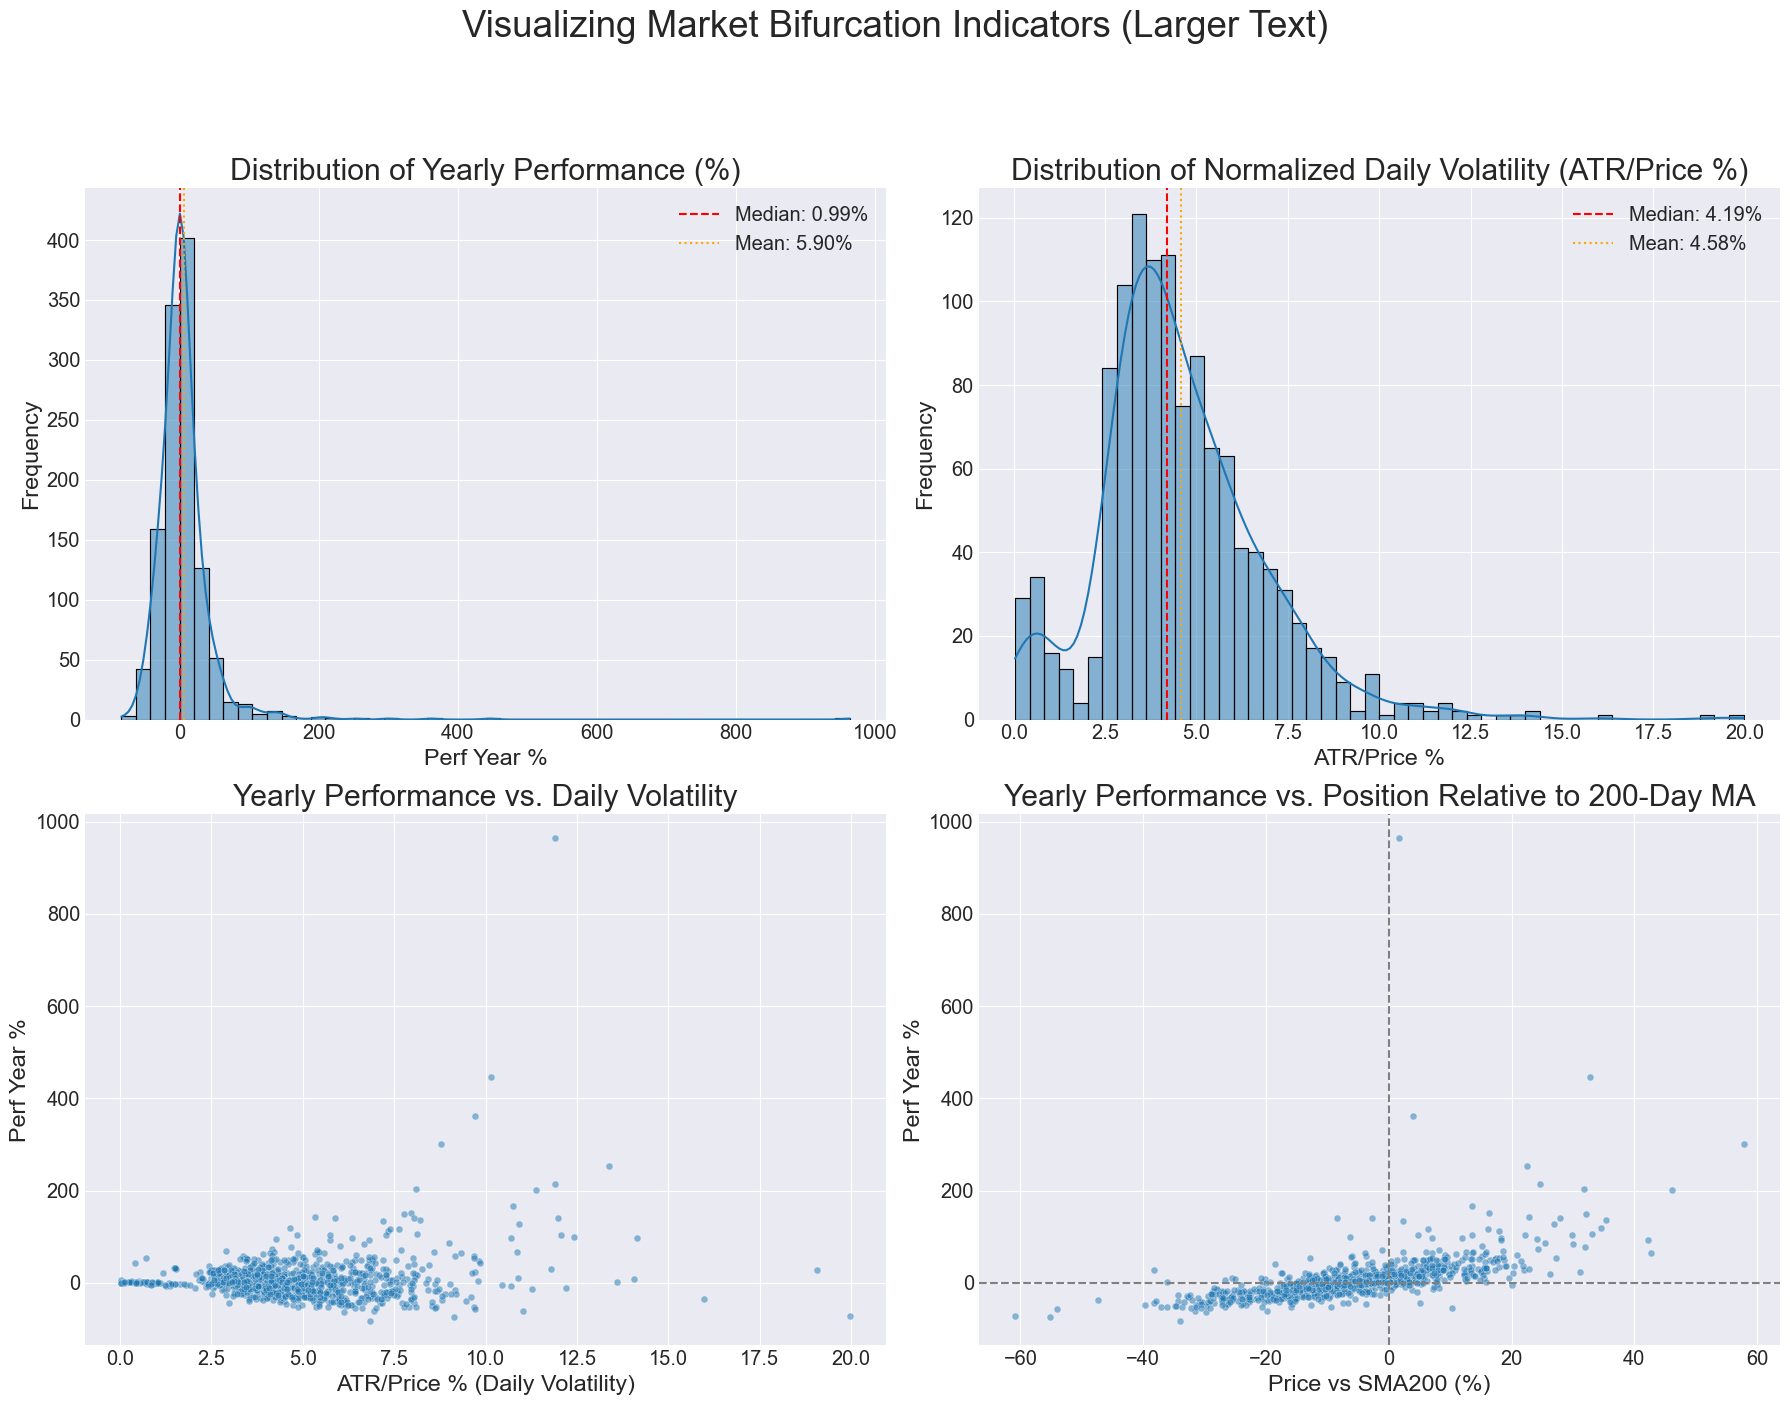

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Will be used if we need to handle potential infinite values if any

# --- IMPORTANT ---
# Ensure your DataFrame is named df_data and contains the columns used below.
# Example: (replace this with your actual data loading)
# df_data = pd.read_csv('your_market_data.csv')

# --- Data Cleaning (Optional but Recommended) ---
# Replace potential infinite values with NaN
df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use a copy to avoid modifying original if needed later
df_plot = df_data.copy()

# --- Font Size Definitions ---
SCALE_FONTSIZE = 1.2  # Scale factor for font sizes
TITLE_FONTSIZE = 18 * SCALE_FONTSIZE
AXIS_LABEL_FONTSIZE = 14 * SCALE_FONTSIZE
TICK_LABEL_FONTSIZE = 12 * SCALE_FONTSIZE
LEGEND_FONTSIZE = 12 * SCALE_FONTSIZE
SUPTITLE_FONTSIZE = 22 * SCALE_FONTSIZE

# --- Visualization ---

plt.style.use('seaborn-v0_8-darkgrid') # Use a visually appealing style
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Increased figure size slightly for larger text
fig.suptitle('Visualizing Market Bifurcation Indicators (Larger Text)', fontsize=SUPTITLE_FONTSIZE, y=1.03) # Adjusted y position slightly

# 1. Histogram of Yearly Performance ('Perf Year %')
sns.histplot(data=df_plot, x='Perf Year %', kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of Yearly Performance (%)', fontsize=TITLE_FONTSIZE)
axes[0, 0].set_xlabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['Perf Year %'].median()
mean_val = df_plot['Perf Year %'].mean()
axes[0, 0].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 0].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 0].legend(fontsize=LEGEND_FONTSIZE)

# 2. Histogram of Normalized Volatility ('ATR/Price %')
sns.histplot(data=df_plot, x='ATR/Price %', kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribution of Normalized Daily Volatility (ATR/Price %)', fontsize=TITLE_FONTSIZE)
axes[0, 1].set_xlabel('ATR/Price %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['ATR/Price %'].median()
mean_val = df_plot['ATR/Price %'].mean()
axes[0, 1].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 1].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 1].legend(fontsize=LEGEND_FONTSIZE)

# 3. Scatter Plot: Yearly Performance vs. Normalized Volatility
sns.scatterplot(data=df_plot, x='ATR/Price %', y='Perf Year %', ax=axes[1, 0], alpha=0.5, s=25) # Slightly larger points
axes[1, 0].set_title('Yearly Performance vs. Daily Volatility', fontsize=TITLE_FONTSIZE)
axes[1, 0].set_xlabel('ATR/Price % (Daily Volatility)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

# 4. Scatter Plot: Yearly Performance vs. Distance from 200-Day MA
sns.scatterplot(data=df_plot, x='SMA200 %', y='Perf Year %', ax=axes[1, 1], alpha=0.5, s=25) # Slightly larger points
axes[1, 1].set_title('Yearly Performance vs. Position Relative to 200-Day MA', fontsize=TITLE_FONTSIZE)
axes[1, 1].set_xlabel('Price vs SMA200 (%)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
axes[1, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA200)
axes[1, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Year

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout slightly for suptitle
plt.show()

In [6]:
# Check df_corr
has_nan_corr = df_corr.isnull().any().any()
print(f"Are there any NaNs in df_corr? {has_nan_corr}")

# Check df_cov
has_nan_cov = df_cov.isnull().any().any()
print(f"Are there any NaNs in df_cov? {has_nan_cov}")

Are there any NaNs in df_corr? False
Are there any NaNs in df_cov? False


In [7]:
df_data.columns

Index(['Company', 'Info', 'MktCap AUM, M', 'Beta', 'RSI', 'Perf YTD %', 'Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %', 'Perf Half %', 'Perf Year %', 'SMA20 %', 'SMA50 %', 'SMA200 %', '50D High %', '50D Low %', '52W High %', '52W Low %', 'ATR', 'ATR/Price %', 'Volatility W %', 'Volatility M %', 'Volume, M', 'Avg Volume, M', 'Rel Volume', 'Price', 'Change %', 'Sharpe 3d', 'Sortino 3d', 'Omega 3d', 'Sharpe 5d', 'Sortino 5d', 'Omega 5d', 'Sharpe 10d', 'Sortino 10d', 'Omega 10d', 'Sharpe 15d', 'Sortino 15d', 'Omega 15d', 'Sharpe 30d', 'Sortino 30d', 'Omega 30d', 'Sharpe 60d', 'Sortino 60d', 'Omega 60d', 'Sharpe 120d', 'Sortino 120d', 'Omega 120d', 'Sharpe 250d', 'Sortino 250d', 'Omega 250d'], dtype='object')

In [8]:
df_data.describe()

,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
count,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000,1180.0000
mean,59114.5932,0.9948,44.6224,-4.7219,5.3054,-5.3762,-3.3151,-5.4724,-3.9076,5.9045,-3.1519,-6.3433,-5.2951,-16.2327,13.4116,-21.6070,29.3063,4.5577,4.5777,7.7699,3.7529,14.5511,6.5127,2.0863,99.5708,8.3697,-59.7374,577.4473,52.4481,-1.4045,0.1804,1.0603,-1.9763,-2.4727,0.7498,-1.5501,-1.8858,0.7924,-1.0476,-1.3058,0.8549,-0.2696,-0.2572,0.9746,-0.3725,-0.4269,0.9470,0.2279,0.4053,1.0547
std,199351.5250,0.5418,6.2213,14.1438,6.8524,4.6020,7.2523,14.1745,20.3118,46.4956,4.4370,6.7154,12.5791,10.2499,8.8234,13.9210,52.6811,5.8991,2.2897,3.9285,1.9489,39.9149,14.6953,0.8381,114.3941,5.7946,2047.9536,1445.3033,128.7558,4.6412,8.1201,0.8055,2.1133,2.8465,0.3090,1.9285,2.6498,0.3071,1.4729,2.1553,0.2729,1.3560,1.9737,0.2590,0.9814,1.4158,0.1811,0.8132,1.2541,0.1640
min,2880.0000,-3.3900,24.9700,-64.1800,-31.9301,-22.5000,-44.7400,-61.9900,-64.9300,-83.5600,-22.7900,-41.1500,-60.8800,-65.6700,-0.0600,-95.2600,0.2400,0.0200,0.0358,0.0100,0.0100,0.6075,0.7506,0.5900,2.1600,-35.2800,-46856.9203,-15.8745,0.0000,-29.8833,-14.4216,0.0000,-14.0954,-11.2274,0.1114,-11.8165,-10.0702,0.1588,-5.0972,-5.7741,0.3237,-5.0644,-5.6374,0.4040,-3.7345,-4.1288,0.5195,-2.2130,-2.6104,0.6820
25%,8840.0000,0.6800,41.0675,-12.9500,0.5577,-7.7125,-6.8525,-13.7350,-14.0925,-13.1850,-5.2125,-10.3550,-12.1925,-22.0125,8.0000,-29.6525,10.2375,1.1675,3.2183,5.6350,2.6600,2.6491,1.5100,1.5200,34.1500,4.7450,4.2501,13.6799,2.2187,-3.6824,-5.1587,0.5380,-3.0822,-4.1906,0.5674,-2.5704,-3.4483,0.6028,-1.9454,-2.6137,0.6943,-1.1628,-1.5806,0.8009,-0.9981,-1.3370,0.8273,-0.3005,-0.4183,0.9468
50%,17650.0000,0.9850,44.3200,-4.7450,4.5700,-5.0750,-3.2250,-5.1300,-5.0700,0.9950,-2.8200,-6.0300,-5.2400,-14.3750,11.7500,-19.3300,17.1900,2.7000,4.1891,7.0900,3.4500,5.3932,2.6700,1.9200,63.4800,7.9500,7.0394,37.7564,4.3636,-0.5713,-1.0123,0.9051,-1.9518,-2.8570,0.6980,-1.4977,-2.1279,0.7434,-1.2541,-1.7279,0.7911,-0.4799,-0.6768,0.9133,-0.4650,-0.6522,0.9153,0.2089,0.2986,1.0390
75%,45310.0000,1.2400,47.8825,2.0525,8.8329,-2.4400,-0.1375,2.1825,3.3325,15.1650,-0.5900,-1.6925,0.6500,-8.7775,16.8350,-11.1400,31.5275,5.5025,5.7282,9.6700,4.6800,11.8957,5.5900,2.4400,115.1850,11.0275,9.0514,93.4881,9.3286,1.7148,3.9142,1.3741,-0.6898,-1.0754,0.8794,-0.4201,-0.6593,0.9221,-0.2892,-0.3988,0.9485,0.6078,0.8908,1.1215,0.2571,0.3642,1.0490,0.7143,1.0565,1.1401
max,2987140.0000,4.2200,83.4700,78.9300,46.2772,11.9400,41.0200,73.8500,190.7400,963.4400,14.2500,30.5600,57.8000,0.9700,76.7500,0.9700,1113.0700,50.6500,19.9687,41.0300,17.2900,774.5057,295.3600,7.8800,965.1900,54.7900,22703.5218,4653.4302,415.5605,11.7353,64.5641,9.1343,7.7936,21.5756,4.7932,6.4484,17.8111,3.9239,6.5777,14.9903,3.2931,4.5577,9.3492,2.3236,2.7971,8.8243,2.2504,3.6077,7.1822,1.8481


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, AAPL to IYR
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1180 non-null   object 
 1   Info            1180 non-null   object 
 2   MktCap AUM, M   1180 non-null   float64
 3   Beta            1180 non-null   float64
 4   RSI             1180 non-null   float64
 5   Perf YTD %      1180 non-null   float64
 6   Perf 3D %       1180 non-null   float64
 7   Perf Week %     1180 non-null   float64
 8   Perf Month %    1180 non-null   float64
 9   Perf Quart %    1180 non-null   float64
 10  Perf Half %     1180 non-null   float64
 11  Perf Year %     1180 non-null   float64
 12  SMA20 %         1180 non-null   float64
 13  SMA50 %         1180 non-null   float64
 14  SMA200 %        1180 non-null   float64
 15  50D High %      1180 non-null   float64
 16  50D Low %       1180 non-null   float64
 17  52W High %      1180 non-null   floa

In [10]:
import pandas as pd
import numpy as np
import logging
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
import os # Added for path manipulation

# ==============================================================================
# Helper Functions
# ==============================================================================

def setup_logging(log_filepath): # Changed arg name for clarity
    """Configures logging to write to both console and file."""
    # Ensure the directory for the log file exists
    log_dir = os.path.dirname(log_filepath)
    if log_dir and not os.path.exists(log_dir):
        os.makedirs(log_dir)
        print(f"Created log directory: {log_dir}") # Print confirmation

    # Remove existing handlers to avoid duplicate logs if called multiple times
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)

    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(log_filepath, mode='w'), # 'w' mode overwrites old file
            logging.StreamHandler()
        ]
    )
    logging.info(f"Logging configured. Output file: {log_filepath}")


def _prepare_data(df_data):
    """
    Performs initial data cleaning and preparation.
    - Converts specified columns to numeric.
    - Assumes 'ATR/Price %' is already present in df_data if needed and includes it in numeric conversion.
    - Handles potential errors during conversion.

    Args:
        df_data (pd.DataFrame): The raw input DataFrame, potentially including 'ATR/Price %'.

    Returns:
        tuple: (pd.DataFrame: Prepared data, list: Volatility columns used)
    """
    df = df_data.copy() # Work on a copy to avoid modifying the original DataFrame
    logging.info("Preparing data: Converting numeric columns.")

    # Define columns expected to be numeric
    numeric_cols = ['Beta', 'ATR', 'RSI', 'Rel Volume', 'Price', 'MktCap AUM, M', # Added MktCap
                    'Volatility W %', 'Volatility M %', 'Perf 3D %',
                    'Perf Week %', 'Perf Month %', 'Perf Quart %',
                    'SMA20 %', 'SMA50 %', 'SMA200 %', 'ATR/Price %'] # Added 'ATR/Price %' here

    # Also include Sharpe, Sortino, Omega columns if they follow a pattern
    for col in df.columns:
        # Check if column *should* be numeric based on common prefixes/suffixes or explicit list
        is_potentially_numeric = any(
            col.startswith(prefix) for prefix in
            ['Sharpe ', 'Sortino ', 'Omega ', 'Perf ', 'SMA', 'Volatility ']
        ) or col in numeric_cols

        if is_potentially_numeric and col in df.columns:
            try:
                # Attempt conversion, removing non-numeric characters except '.' and '-'
                df[col] = pd.to_numeric(
                    df[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True),
                    errors='coerce' # Set invalid parsing as NaN
                )
                logging.debug(f"Successfully attempted numeric conversion for column '{col}'.")
            except Exception as e:
                logging.warning(f"Could not convert column '{col}' to numeric: {e}")
                df[col] = np.nan # Ensure column exists but filled with NaN if error

    # Determine which volatility columns are actually available and potentially numeric
    volatility_cols_base = ['Volatility W %', 'Volatility M %']
    volatility_cols_used = []

    # Check base columns first
    for col in volatility_cols_base:
         if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
              if df[col].notna().any(): # Check if there's at least one non-NaN value
                   volatility_cols_used.append(col)
                   logging.debug(f"Using base volatility column: '{col}'")
              else:
                   logging.info(f"Base volatility column '{col}' found but contains only NaN values. Excluding.")

    # Check if 'ATR/Price %' exists and has numeric data after preparation
    atr_price_col = 'ATR/Price %'
    if atr_price_col in df.columns and pd.api.types.is_numeric_dtype(df[atr_price_col]):
         if df[atr_price_col].notna().any(): # Check if there's at least one non-NaN value after conversion
             volatility_cols_used.append(atr_price_col)
             logging.info(f"Found valid numeric data for '{atr_price_col}'. Added to volatility metrics.")
         else:
             logging.info(f"Volatility column '{atr_price_col}' found but contains only NaN values after conversion. Excluding.")

    if not volatility_cols_used:
        logging.warning("No valid volatility columns found after data preparation.")
    else:
        logging.info(f"Final volatility metrics being used: {volatility_cols_used}")

    return df, volatility_cols_used


def _calculate_component_scores(df, cols, weight, name, intermediates, raw_values, apply_zscore=True, custom_weights=None):
    """
    Calculates the weighted score component for a given set of columns.
    Handles Z-score calculation and optional custom weighting (like for momentum).

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        cols (list): List of column names for this component.
        weight (float): The feature weight for this component.
        name (str): The name of the component (e.g., 'sharpe', 'momentum').
        intermediates (dict): Dictionary to store intermediate Z-score values.
        raw_values (dict): Dictionary to store raw column values.
        apply_zscore (bool): Whether to apply Z-scoring. Default True.
        custom_weights (np.array): Optional array of weights for weighted average (e.g., momentum decay).

    Returns:
        pd.Series: The calculated weighted score for this component. Returns zero series if cols are missing.
    """
    # Check if all required columns exist
    missing_cols = [col for col in cols if col not in df.columns]
    if missing_cols:
        logging.warning(f"Missing columns for '{name}' component: {missing_cols}. Skipping this component.")
        return pd.Series(0, index=df.index, name=f"weighted_{name}")

    # Check if provided cols actually exist after potential drops/missing data
    valid_cols = [col for col in cols if col in df.columns]
    if not valid_cols:
        logging.warning(f"None of the columns for '{name}' component exist: {cols}. Skipping this component.")
        return pd.Series(0, index=df.index, name=f"weighted_{name}")

    component_data = df[valid_cols].copy() # Use only valid columns
    raw_values[f'{name}_raw'] = component_data # Store raw values

    # Handle potential NaNs introduced by cleaning/conversion before Z-scoring
    component_data = component_data.fillna(component_data.mean()) # Impute NaNs with mean for scoring

    if apply_zscore:
        # Calculate Z-scores, handle columns with zero standard deviation
        z_scores = component_data.apply(lambda x: (x - x.mean()) / x.std() if x.std() > 1e-9 else 0)
        intermediates[f'{name}_zscores'] = z_scores
        score_basis = z_scores
    else:
        # Use raw (or imputed) data if no Z-scoring needed (e.g., for pre-calculated scores)
        score_basis = component_data

    # Calculate the final component score
    if custom_weights is not None:
        # Adjust custom_weights if some columns were missing
        if len(valid_cols) != len(cols):
             # Find indices of valid columns within the original list
             valid_indices = [i for i, col in enumerate(cols) if col in valid_cols]
             # Select corresponding weights
             effective_weights = custom_weights[valid_indices]
             # Renormalize weights if needed (optional, depends on intent)
             # effective_weights = effective_weights / np.sum(effective_weights)
             logging.warning(f"Using subset of custom weights for '{name}' due to missing columns.")
        else:
             effective_weights = custom_weights

        if len(effective_weights) != score_basis.shape[1]:
             logging.error(f"Length mismatch after adjustment: effective_weights ({len(effective_weights)}) vs columns for {name} ({score_basis.shape[1]})")
             # Handle error: return zero score or raise? Returning zero for now.
             return pd.Series(0, index=df.index, name=f"weighted_{name}")

        # Weighted average using matrix multiplication for efficiency
        component_score = (score_basis @ effective_weights) * weight
    else:
        # Simple mean if no custom weights
        component_score = score_basis.mean(axis=1) * weight

    return component_score.rename(f"weighted_{name}")


def _calculate_rsi_score(df, raw_values):
    """
    Calculates the RSI component score with penalties for overbought (>70)
    and rewards for oversold (<30).

    Args:
        df (pd.DataFrame): DataFrame containing the 'RSI' column.
        raw_values (dict): Dictionary to store raw RSI values.

    Returns:
        pd.Series: The calculated RSI score component. Returns zero series if RSI column is missing.
    """
    if 'RSI' not in df.columns:
        logging.warning("Missing 'RSI' column. Skipping RSI scoring component.")
        return pd.Series(0, index=df.index, name="weighted_rsi")

    rsi_values = df['RSI'].copy()
    raw_values['rsi_raw'] = rsi_values # Store raw RSI

    # Define conditions and corresponding score adjustments
    conditions = [
        rsi_values > 70,                        # Overbought penalty
        rsi_values < 30,                        # Oversold reward
        (rsi_values >= 30) & (rsi_values <= 70) # Neutral zone
    ]
    choices = [
        np.clip((rsi_values - 70) * -0.01, a_min=-0.15, a_max=0),  # Penalty capped at -0.15
        np.clip((30 - rsi_values) * 0.005, a_min=0, a_max=0.075),  # Reward capped at +0.075
        0                                                          # No adjustment in neutral zone
    ]

    # Use np.select for vectorized conditional assignment
    rsi_score = pd.Series(
        np.select(conditions, choices, default=0), # Default to 0 if NaN or outside defined ranges
        index=df.index,
        name="weighted_rsi"
    )

    # Handle potential NaNs in RSI input - replace resulting NaNs in score with 0
    rsi_score = rsi_score.fillna(0)

    return rsi_score


def calculate_composite_score(df, feature_weights, column_definitions):
    """
    Calculates the composite score based on various weighted metrics.

    Args:
        df (pd.DataFrame): The cleaned data DataFrame.
        feature_weights (dict): Dictionary of weights for each score component.
        column_definitions (dict): Dictionary containing lists of column names for each component.

    Returns:
        tuple: (pd.Series: composite_score,
                dict: intermediate_values (like z-scores),
                dict: raw_values)
    """
    logging.info("Calculating composite scores for tickers.")
    components = {}
    intermediate_values = {}
    raw_values = {}

    # --- Risk-adjusted metrics (Sharpe, Sortino, Omega) ---
    for category, cols_key in [('sharpe', 'sharpe'),
                               ('sortino', 'sortino'),
                               ('omega', 'omega')]:
        if category in feature_weights and feature_weights[category] != 0:
            components[category] = _calculate_component_scores(
                df, column_definitions[cols_key], feature_weights[category], category, intermediate_values, raw_values
            )

    # --- Momentum with decay weights ---
    if 'momentum' in feature_weights and feature_weights['momentum'] != 0:
        # Ensure momentum_weights aligns with the actual momentum columns used
        components['momentum'] = _calculate_component_scores(
            df, column_definitions['momentum'], feature_weights['momentum'], 'momentum',
            intermediate_values, raw_values,
            custom_weights=np.array(column_definitions['momentum_weights']) # Ensure it's an array
        )

    # --- Technical indicators (SMA, Volatility) ---
    for category, cols_key in [('sma', 'sma'),
                              ('volatility', 'volatility')]: # Use dynamic volatility cols
        if category in feature_weights and feature_weights[category] != 0:
            # Note: Volatility has a negative weight (penalty)
            components[category] = _calculate_component_scores(
                df, column_definitions[cols_key], feature_weights[category], category, intermediate_values, raw_values
            )

    # --- Enhanced RSI scoring ---
    # No weight needed from feature_weights dict, logic is self-contained
    components['rsi'] = _calculate_rsi_score(df, raw_values)

    # --- Combine components ---
    component_breakdown = pd.concat(components.values(), axis=1) # concat Series directly
    intermediate_values['component_breakdown'] = component_breakdown # Store the weighted breakdown
    composite_score = component_breakdown.sum(axis=1)

    logging.info("Composite score calculation finished.")
    # Log intermediate keys for debugging structure
    logging.debug(f"Intermediate keys generated: {list(intermediate_values.keys())}")
    logging.debug(f"Raw value keys generated: {list(raw_values.keys())}")

    return composite_score, intermediate_values, raw_values


def perform_clustering(df_scores, df_corr, num_tickers_to_select, num_clusters, score_col='composite_score'):
    """
    Selects top N tickers based on score and performs hierarchical clustering.
    Uses num_tickers_to_select which might be adjusted from the original request.

    Args:
        df_scores (pd.DataFrame): DataFrame with tickers and scores.
        df_corr (pd.DataFrame): Correlation matrix DataFrame.
        num_tickers_to_select (int): Actual number of top tickers to select for clustering.
        num_clusters (int): Number of clusters to form.
        score_col (str): Name of the column containing the scores.

    Returns:
        tuple: (pd.DataFrame: Top N tickers with scores,
                pd.Series: Cluster assignments for top N tickers (index=ticker, value=cluster_id),
                pd.DataFrame: Correlation subset used for clustering)
                Returns (None, None, None) on failure.
    """
    # This function now assumes num_tickers_to_select <= len(df_scores)
    logging.info(f"Selecting top {num_tickers_to_select} tickers based on '{score_col}'.")

    # Check if enough tickers are available (should be guaranteed by caller, but double-check)
    if len(df_scores) < num_tickers_to_select:
         logging.error(f"Internal Error: Trying to select {num_tickers_to_select} tickers, but only {len(df_scores)} are in df_scores.")
         return None, None, None

    if num_tickers_to_select <= 1:
         logging.warning(f"Cannot perform clustering with {num_tickers_to_select} tickers. Need at least 2.")
         return None, None, None

    top_n = df_scores.nlargest(num_tickers_to_select, score_col)
    top_n_tickers = top_n.index.tolist()
    logging.info(f"Selected tickers: {top_n_tickers[:5]}... (first 5 shown)")

    logging.info(f"Performing hierarchical clustering into {num_clusters} clusters.")

    # --- Robust Subset and Distance Matrix Calculation ---
    try:
        # Subset correlation matrix for the top N tickers
        corr_subset = df_corr.loc[top_n_tickers, top_n_tickers]

        # 1. Ensure symmetry (numerical precision issues can sometimes occur)
        corr_subset = (corr_subset + corr_subset.T) / 2
        # 2. Calculate distance (1 - absolute correlation)
        distance_matrix = 1 - np.abs(corr_subset)
        # 3. Ensure diagonal is zero
        np.fill_diagonal(distance_matrix.values, 0)
        # 4. Check for NaNs or Infs in the distance matrix
        if distance_matrix.isna().any().any() or np.isinf(distance_matrix.values).any():
            logging.warning("NaNs or Infs found in distance matrix. Attempting to fill with mean distance.")
            # Replace NaNs/Infs with the mean of finite distances
            finite_distances = distance_matrix.values[np.isfinite(distance_matrix.values)]
            mean_distance = np.mean(finite_distances) if len(finite_distances) > 0 else 0.5 # Fallback if all are bad
            distance_matrix = distance_matrix.fillna(mean_distance)
            distance_matrix.values[np.isinf(distance_matrix.values)] = mean_distance
            # Ensure diagonal is still zero after fillna
            np.fill_diagonal(distance_matrix.values, 0)
            # Final check for non-finite values after attempting fill
            if not np.all(np.isfinite(distance_matrix.values)):
                 logging.error("Distance matrix still contains non-finite values after fill attempt. Cannot proceed.")
                 # distance_matrix.to_csv("debug_distance_matrix_error.csv") # Optional: dump for inspection
                 return None, None, None

    except KeyError as e:
        missing_tickers = [t for t in top_n_tickers if t not in df_corr.index or t not in df_corr.columns]
        logging.error(f"KeyError during correlation matrix subsetting. Missing tickers: {missing_tickers}. Error: {e}")
        return None, None, None
    except Exception as e:
        logging.error(f"Error during distance matrix preparation: {e}", exc_info=True)
        return None, None, None

    # --- Clustering ---
    try:
        # Convert to condensed distance matrix format required by linkage
        condensed_dist = squareform(distance_matrix, checks=True) # checks=True verifies symmetry etc.
        linkage_matrix = linkage(condensed_dist, method='ward')

        # Adjust num_clusters if it's > number of items being clustered
        actual_num_clusters = min(num_clusters, num_tickers_to_select - 1) # Max clusters is N-1
        if actual_num_clusters < num_clusters:
            logging.warning(f"Requested {num_clusters} clusters, but only {num_tickers_to_select} tickers selected. Reducing clusters to {actual_num_clusters}.")
        if actual_num_clusters < 1:
             logging.error(f"Cannot form clusters. Number of tickers ({num_tickers_to_select}) is too small.")
             return None, None, None

        cluster_ids = fcluster(linkage_matrix, t=actual_num_clusters, criterion='maxclust')
        cluster_assignments = pd.Series(cluster_ids, index=top_n_tickers, name='cluster')
        logging.info(f"Clustering successful. Formed {len(cluster_assignments.unique())} clusters.")

    except ValueError as ve:
        logging.error(f"Clustering failed. Error during linkage/fcluster: {ve}")
        logging.error("This might be due to issues in the distance matrix (e.g., non-finite values, symmetry problems).")
        # distance_matrix.to_csv("debug_distance_matrix_value_error.csv") # Optional
        return None, None, None # Indicate failure
    except Exception as e:
        logging.error(f"An unexpected error occurred during clustering: {e}", exc_info=True)
        return None, None, None # Indicate failure


    return top_n, cluster_assignments, corr_subset


def analyze_clusters(cluster_assignments, top_n, df_cov, df_corr_subset, df_clean_data, score_col='composite_score'):
    """
    Analyzes the clusters, calculates risk-adjusted scores, and generates summary statistics.

    Args:
        cluster_assignments (pd.Series): Cluster assignments for top N tickers.
        top_n (pd.DataFrame): Top N tickers with scores.
        df_cov (pd.DataFrame): Covariance matrix DataFrame.
        df_corr_subset (pd.DataFrame): Correlation matrix subset for the top N tickers.
        df_clean_data (pd.DataFrame): Original cleaned data (needed for Price, MktCap, etc.).
        score_col (str): Name of the column containing the raw scores.

    Returns:
        tuple: (pd.DataFrame: detailed_clusters_df,
                pd.DataFrame: cluster_stats_df)
               Returns (None, None) if input is invalid.
    """
    if cluster_assignments is None or top_n is None:
         logging.warning("Cannot analyze clusters due to invalid input (cluster_assignments or top_n is None).")
         return None, None

    logging.info("Analyzing clusters and calculating risk-adjusted scores.")

    # Check for required columns in df_clean_data
    required_analysis_cols = ['Price', 'MktCap AUM, M', 'Volatility M %']
    missing_analysis_cols = [col for col in required_analysis_cols if col not in df_clean_data.columns]
    if missing_analysis_cols:
        logging.warning(f"Missing columns in df_clean_data needed for analysis: {missing_analysis_cols}. These columns will be omitted.")
    available_analysis_cols = [col for col in required_analysis_cols if col in df_clean_data.columns]


    # Create a DataFrame combining cluster info, scores, and other relevant data
    cluster_df = pd.DataFrame({
        'ticker': cluster_assignments.index,
        'cluster': cluster_assignments.values
    }).merge(
        top_n[[score_col]], # Get the score from top_n df
        left_on='ticker',
        right_index=True
    ).merge(
        df_clean_data[available_analysis_cols], # Add available stats from original clean data
        left_on='ticker',
        right_index=True,
        how='left' # Use left merge in case some columns are missing in df_clean_data for a ticker
    )

    # --- Calculate Variance and Risk-Adjusted Score ---
    # Extract variance (diagonal of covariance matrix) for each ticker
    variances = []
    tickers_in_cluster_df = cluster_df['ticker'].tolist()
    valid_tickers_cov = [t for t in tickers_in_cluster_df if t in df_cov.index and t in df_cov.columns]
    missing_tickers_cov = set(tickers_in_cluster_df) - set(valid_tickers_cov)

    if missing_tickers_cov:
         logging.warning(f"Tickers missing from covariance matrix diagonals: {list(missing_tickers_cov)}. Variance will be NaN.")

    # Create a variance series aligned with cluster_df's index
    variance_series = pd.Series(np.nan, index=cluster_df.index)
    try:
        # Efficiently get diagonal elements for valid tickers
        valid_variances = np.diag(df_cov.loc[valid_tickers_cov, valid_tickers_cov])
        # Map these variances back to the cluster_df index based on ticker
        ticker_to_variance = dict(zip(valid_tickers_cov, valid_variances))
        variance_series = cluster_df['ticker'].map(ticker_to_variance) # Map will put NaN where ticker is missing

    except Exception as e:
         logging.error(f"Error accessing covariance matrix diagonal: {e}", exc_info=True)
         # variance_series remains as NaNs

    cluster_df['variance'] = variance_series

    # Calculate volatility (sqrt of variance), handle negative variance due to numerical issues
    cluster_df['volatility'] = np.sqrt(np.maximum(cluster_df['variance'], 0)) # Use maximum to avoid errors with tiny negatives

    # Calculate Risk-Adjusted Score (Score / Volatility)
    # Add epsilon to denominator to avoid division by zero if variance is exactly zero
    epsilon = 1e-9
    valid_volatility_mask = cluster_df['volatility'].notna() & (cluster_df['volatility'] > epsilon) # Check for NaN and > epsilon
    cluster_df['risk_adj_score'] = np.nan # Initialize column
    cluster_df.loc[valid_volatility_mask, 'risk_adj_score'] = (
        cluster_df.loc[valid_volatility_mask, score_col] /
        cluster_df.loc[valid_volatility_mask, 'volatility'] # Use volatility directly
    )
    # Log if any risk-adj scores couldn't be calculated
    num_nan_risk_adj = cluster_df['risk_adj_score'].isna().sum()
    if num_nan_risk_adj > 0:
        logging.warning(f"{num_nan_risk_adj} tickers have NaN risk-adjusted scores (likely due to missing/zero variance/volatility).")

    # --- Prepare Detailed Output ---
    detailed_cols_to_include = ['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility'] # Basic columns
    # Add other analysis cols if available
    if 'Price' in cluster_df.columns: detailed_cols_to_include.append('Price')
    if 'MktCap AUM, M' in cluster_df.columns: detailed_cols_to_include.append('MktCap AUM, M')

    detailed_clusters_df = cluster_df.rename(columns={
        'cluster': 'Cluster_ID',
        'ticker': 'Ticker',
        score_col: 'Raw_Score', # Use the dynamic score_col name
        'risk_adj_score': 'Risk_Adj_Score',
        'volatility': 'Volatility'
    }).sort_values(
        ['Cluster_ID', 'Risk_Adj_Score'], ascending=[True, False] # Sort by cluster, then descending risk-adj score
    )[detailed_cols_to_include] # Select and order columns


    # --- Prepare Cluster Statistics ---
    logging.info("Calculating cluster summary statistics.")
    # Function to safely calculate mean correlation within a cluster
    def safe_mean_corr(tickers_series, corr_matrix):
        tickers = tickers_series.tolist()
        if len(tickers) <= 1:
            return 1.0 # Correlation is 1 for a single ticker cluster
        try:
             # Ensure all tickers are in the correlation matrix subset
             valid_tickers = [t for t in tickers if t in corr_matrix.index and t in corr_matrix.columns]
             if len(valid_tickers) <= 1:
                 logging.warning(f"Not enough valid tickers ({len(valid_tickers)}) in corr matrix for cluster: {tickers}. Returning NaN for Avg Corr.")
                 return np.nan

             cluster_corr = corr_matrix.loc[valid_tickers, valid_tickers]
             # Exclude diagonal (self-correlation) before calculating mean
             np.fill_diagonal(cluster_corr.values, np.nan)
             # Check if all values became NaN (happens if only 1 valid ticker)
             if np.isnan(cluster_corr.values).all():
                  return 1.0 # Effectively a single-ticker cluster after filtering
             return np.nanmean(cluster_corr.values) # Use nanmean to ignore NaNs from diagonal

        except KeyError as e:
            logging.warning(f"KeyError calculating mean correlation for cluster containing: {tickers}. Error: {e}. Returning NaN.")
            return np.nan
        except Exception as e:
             logging.warning(f"Error calculating mean correlation for cluster {tickers}: {e}")
             return np.nan

    cluster_stats_df = cluster_df.groupby('cluster').agg(
        Size=('ticker', 'count'),
        Avg_Correlation=('ticker', lambda t: safe_mean_corr(t, df_corr_subset)),
        Avg_Raw_Score=(score_col, 'mean'),
        Avg_Risk_Adj_Score=('risk_adj_score', 'mean'), # Mean calculation will ignore NaNs by default
        Avg_Volatility=('volatility', 'mean')          # Mean calculation will ignore NaNs by default
    ).reset_index().round(4) # Increased precision slightly

    # Rename columns for clarity
    cluster_stats_df.columns = ['Cluster_ID', 'Size', 'Avg_IntraCluster_Corr',
                              'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Avg_Volatility']


    logging.info("Cluster analysis complete.")
    return detailed_clusters_df, cluster_stats_df


def _assemble_output_df(intermediate_values, raw_values, composite_scores, cluster_assignments, base_index):
    """
    Assembles the final DataFrame containing scores, components, and cluster info.
    Handles potential None for cluster_assignments.
    """
    logging.info("Assembling final output DataFrame (zscore_df).")

    # --- Intermediate Values (Z-scores, weighted components) ---
    intermediates_df = pd.DataFrame(index=base_index)
    # Add component breakdown first if it exists
    if 'component_breakdown' in intermediate_values:
        # Ensure index alignment before concatenating
        comp_breakdown = intermediate_values['component_breakdown'].reindex(base_index)
        intermediates_df = pd.concat([intermediates_df, comp_breakdown], axis=1)

    # Add other intermediate values (like individual z-scores per category)
    for key, values in intermediate_values.items():
        if key == 'component_breakdown': continue # Already added

        if isinstance(values, pd.DataFrame):
            # Prefix columns to avoid name collisions and ensure alignment
            prefixed_values = values.add_prefix(f'{key}_').reindex(base_index)
            intermediates_df = pd.concat([intermediates_df, prefixed_values], axis=1)
        elif isinstance(values, pd.Series):
             # Ensure index alignment before adding Series
             intermediates_df[key] = values.reindex(base_index)
        else:
            logging.warning(f"Unexpected data type in intermediate_values for key '{key}': {type(values)}. Skipping.")

    # --- Raw Values ---
    raw_vals_df = pd.DataFrame(index=base_index)
    for key, values in raw_values.items():
        if isinstance(values, pd.DataFrame):
             # Prefix columns and ensure alignment
            prefixed_values = values.add_prefix(f'{key}_').reindex(base_index)
            raw_vals_df = pd.concat([raw_vals_df, prefixed_values], axis=1)
        elif isinstance(values, pd.Series):
             # Ensure index alignment
            raw_vals_df[key] = values.reindex(base_index)
        else:
            logging.warning(f"Unexpected data type in raw_values for key '{key}': {type(values)}. Skipping.")

    # --- Cluster Assignments (Handle None) --- FIX APPLIED HERE
    if cluster_assignments is not None:
        cluster_col = cluster_assignments.reindex(base_index).rename('cluster')
    else:
        # If clustering failed or wasn't run, create a column of NaNs
        cluster_col = pd.Series(np.nan, index=base_index, name='cluster')

    # --- Combine all parts ---
    final_df = pd.concat([
        intermediates_df,
        raw_vals_df,
        composite_scores.rename('composite_score').reindex(base_index),
        cluster_col # Add the potentially NaN cluster column
    ], axis=1)

    logging.info("Final output DataFrame assembled.")
    return final_df


def log_results_to_file(results_filepath, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols, top_n=20):
    """Writes the analysis results to the specified results file."""
    logging.info(f"Writing detailed results to file: {results_filepath}")

    # Ensure the directory for the results file exists
    results_dir = os.path.dirname(results_filepath)
    if results_dir and not os.path.exists(results_dir):
        try:
            os.makedirs(results_dir)
            logging.info(f"Created results directory: {results_dir}")
        except OSError as e:
            logging.error(f"Could not create results directory {results_dir}: {e}. Results will not be saved to file.")
            return # Stop if directory cannot be created

    try:
        # Use 'w' mode to overwrite previous results, or 'a' to append if desired
        with open(results_filepath, 'w') as f:
            f.write("="*30 + " PORTFOLIO OPTIMIZATION RESULTS " + "="*30 + "\n")
            f.write(f"Analysis Timestamp: {pd.Timestamp.now()}\n")

            f.write("\n\n" + "="*20 + " CLUSTER STATISTICS " + "="*20 + "\n")
            if cluster_stats_df is not None and not cluster_stats_df.empty:
                cluster_stats_df.to_string(f, index=False, line_width=120)
            elif cluster_stats_df is not None and cluster_stats_df.empty:
                 f.write("Cluster statistics table generated but is empty.\n")
            else:
                f.write("Cluster statistics could not be generated (likely due to clustering failure or lack of tickers).\n")

            f.write("\n\n" + "="*20 + " DETAILED CLUSTERS (ALL SELECTED) " + "="*20 + "\n")
            if detailed_clusters_df is not None and not detailed_clusters_df.empty:
                detailed_clusters_df.to_string(f, index=False, line_width=150) # Wider width for more columns
            elif detailed_clusters_df is not None and detailed_clusters_df.empty:
                 f.write("Detailed cluster information table generated but is empty.\n")
            else:
                f.write("Detailed cluster information could not be generated.\n")

            f.write("\n\n" + "="*20 + f" SCORING DETAILS & COMPONENTS (Top {top_n})" + "="*20 + "\n")
            zscore_df_sorted = None
            if zscore_df is not None and not zscore_df.empty:
                # Check if 'composite_score' exists before sorting
                if 'composite_score' in zscore_df.columns:
                     # Handle potential all-NaN composite scores if calculation failed badly
                     if zscore_df['composite_score'].notna().any():
                         try:
                             zscore_df_sorted = zscore_df.sort_values('composite_score', ascending=False)
                             zscore_df_sorted.head(top_n).to_string(f, line_width=180) # Wider line width
                         except Exception as sort_e:
                              logging.warning(f"Could not sort zscore_df by composite_score: {sort_e}. Logging top {top_n} unsorted rows.")
                              zscore_df.head(top_n).to_string(f, line_width=180)
                     else:
                          f.write(f"Scoring details available, but 'composite_score' column contains only NaNs. Logging top {top_n} unsorted rows.\n")
                          zscore_df.head(top_n).to_string(f, line_width=180)
                else:
                     f.write(f"Scoring details available, but 'composite_score' column is missing. Logging top {top_n} unsorted rows.\n")
                     zscore_df.head(top_n).to_string(f, line_width=180)
            elif zscore_df is not None and zscore_df.empty:
                 f.write("Scoring details table (zscore_df) generated but is empty.\n")
            else:
                f.write("Scoring details (zscore_df) could not be generated.\n")

            # --- Add Volatility Breakdown ---
            f.write("\n\n" + "="*20 + " VOLATILITY COMPONENT BREAKDOWN (Top 5) " + "="*20 + "\n")
            if zscore_df_sorted is not None and not zscore_df_sorted.empty: # Check if sorted DF exists and is not empty
                f.write(f"Volatility columns used in scoring: {volatility_cols}\n")

                # Look for the Z-SCORE columns for volatility breakdown (BEFORE weighting)
                vol_zscore_cols = [f'volatility_zscores_{col}' for col in volatility_cols if f'volatility_zscores_{col}' in zscore_df_sorted.columns]

                if vol_zscore_cols:
                    f.write("Top 5 Tickers - Z-Score Volatility Components (before weighting):\n")
                    zscore_df_sorted[vol_zscore_cols].head(5).to_string(f, line_width=120, float_format="%.4f")
                else:
                    f.write("\nCould not find detailed volatility z-score columns (e.g., 'volatility_zscores_Volatility W %') in output.\n")
                    logging.warning("Volatility z-score columns missing from zscore_df for logging breakdown.")

                # Also show the final weighted volatility contribution
                if 'weighted_volatility' in zscore_df_sorted.columns:
                    f.write("\n\nTop 5 Tickers - Final Weighted Volatility Score Component (Lower is better/less penalty):\n")
                    zscore_df_sorted[['weighted_volatility']].head(5).to_string(f, float_format="%.4f")
                else:
                    f.write("\n\nCould not find 'weighted_volatility' column in output.\n")
                    logging.warning("'weighted_volatility' column missing from zscore_df for logging breakdown.")

            elif zscore_df is not None and not zscore_df.empty:
                 f.write("Scoring details available but could not be sorted by composite_score. Cannot show reliable top 5 volatility breakdown.\n")
            else:
                 f.write("Scoring details (zscore_df) not available for volatility breakdown.\n")
            # --- End Volatility Breakdown ---

        logging.info(f"Successfully wrote results data to {results_filepath}")

    except IOError as e:
        logging.error(f"Failed to write results to file {results_filepath}: {e}")
    except Exception as e:
        logging.error(f"An unexpected error occurred while writing results to file {results_filepath}: {e}", exc_info=True)


# ==============================================================================
# Main Refactored Function
# ==============================================================================

def portfolio_optimizer_60days_refactored(
    df_data,
    df_corr,
    df_cov,
    num_clusters=60,
    num_tickers=100, # Target number of tickers
    log_file="portfolio_optimizer.log",
    results_file="portfolio_output_refactored.txt"):
    """
    Refactored: Selects top tickers based on a composite score and optimizes
    a portfolio using cluster analysis. Easier to debug and maintain.

    Args:
        df_data (pd.DataFrame): DataFrame containing stock data with various metrics.
                                Must contain columns for scoring and optionally 'Price', 'MktCap AUM, M'.
        df_corr (pd.DataFrame): DataFrame containing the correlation matrix (tickers x tickers).
        df_cov (pd.DataFrame): DataFrame containing the covariance matrix (tickers x tickers).
        num_clusters (int): The target number of clusters to form.
        num_tickers (int): The target number of top tickers to select based on score.
                           Will be adjusted downwards if not enough tickers pass cleaning.
        log_file (str): Path for the process log file.
        results_file (str): Path for the final data results file.

    Returns:
        tuple: Contains three DataFrames:
               1. pd.DataFrame: Scoring details, intermediate values, raw values,
                  and cluster assignments for all cleaned tickers (`zscore_df`).
               2. pd.DataFrame: Statistics summary for each cluster (`cluster_stats_df`).
               3. pd.DataFrame: Detailed view of tickers within each cluster,
                  sorted by risk-adjusted score (`detailed_clusters_df`).
               Returns (None, None, None) if a critical step fails.
    """
    # Initialize return variables to None
    zscore_df_final, cluster_stats_df_final, detailed_clusters_df_final = None, None, None
    # Initialize intermediate state variables used in exception handling
    cluster_stats_df, detailed_clusters_df = None, None
    zscore_df = None
    volatility_cols_used = []

    try:
        # Use the log_file argument for logging setup
        setup_logging(log_file)
        logging.info("="*30 + " Starting Portfolio Optimization " + "="*30)
        logging.info(f"Target number of tickers: {num_tickers}")
        logging.info(f"Target number of clusters: {num_clusters}")
        logging.info(f"Detailed results will be written to: {results_file}")

        # ===== STAGE 1: DATA PREPARATION =====
        df_prepared, volatility_cols_used = _prepare_data(df_data)

        # ===== STAGE 2: SCORING CONFIGURATION =====
        logging.info("Defining scoring parameters and column groups.")
        time_horizons = [3, 5, 10, 15, 30, 60]
        feature_weights = {
            'sharpe': 0.20,
            'sortino': 0.20,
            'omega': 0.15,
            'momentum': 0.20,
            'sma': 0.15,
            'volatility': -0.10, # Negative weight implies lower volatility is better
            # RSI is handled separately, no weight needed here.
        }
        # Ensure weights match the number of columns
        momentum_cols_list = ['Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %']
        momentum_weights_list = [0.4, 0.3, 0.2, 0.1] # Decay weights for momentum
        if len(momentum_cols_list) != len(momentum_weights_list):
             raise ValueError(f"Mismatch between momentum columns ({len(momentum_cols_list)}) and weights ({len(momentum_weights_list)})")

        column_definitions = {
            'sharpe': [f'Sharpe {days}d' for days in time_horizons],
            'sortino': [f'Sortino {days}d' for days in time_horizons],
            'omega': [f'Omega {days}d' for days in time_horizons],
            'momentum': momentum_cols_list,
            'momentum_weights': momentum_weights_list, # Store alongside cols for easy access
            'sma': ['SMA20 %', 'SMA50 %', 'SMA200 %'],
            'volatility': volatility_cols_used, # Use the dynamically determined list
            'rsi': ['RSI'] # Needed for _calculate_rsi_score check
        }

        # Define all columns required for scoring (used for cleaning)
        # --- CORRECTED LOGIC ---
        required_cols = []
        # Identify components actively used based on non-zero weight OR special cases like RSI
        active_components_for_cols = [k for k, v in feature_weights.items() if v != 0]
        if 'rsi' not in active_components_for_cols: # RSI score is always calculated if column exists
             active_components_for_cols.append('rsi')
        # Also include volatility columns if they exist, even if weight is 0,
        # as they might be needed for analysis or were explicitly prepared.
        if 'volatility' not in active_components_for_cols and volatility_cols_used:
            active_components_for_cols.append('volatility')

        logging.debug(f"Components considered for required columns: {active_components_for_cols}")

        for key in active_components_for_cols:
            if key in column_definitions:
                cols = column_definitions[key]
                if isinstance(cols, list):
                    # Ensure only strings are added (extra safety)
                    string_cols = [item for item in cols if isinstance(item, str)]
                    if len(string_cols) != len(cols):
                         logging.warning(f"Non-string items found in column list for key '{key}'. Only adding strings: {string_cols}")
                    required_cols.extend(string_cols)
                elif isinstance(cols, str): # Handle case like 'rsi': ['RSI'] where cols could be just 'RSI'
                     required_cols.append(cols)
            else:
                 logging.warning(f"Component '{key}' listed as active but not found in column_definitions.")

        # Ensure unique and sort (now guaranteed to be only strings)
        required_cols = sorted(list(set(required_cols)))
        # --- END CORRECTED LOGIC ---

        logging.info(f"Columns required for scoring: {required_cols}")
        logging.info(f"Volatility columns being used: {volatility_cols_used}")


        # --- Data Cleaning (NaN removal based on required columns) ---
        initial_rows = len(df_prepared)
        # Check which required columns actually exist in the prepared dataframe
        existing_required_cols = [col for col in required_cols if col in df_prepared.columns]
        missing_for_clean = sorted(list(set(required_cols) - set(existing_required_cols)))
        if missing_for_clean:
             logging.warning(f"Some required columns for cleaning are missing from the data: {missing_for_clean}")

        if not existing_required_cols:
             logging.error("No required columns found in the data. Cannot proceed with cleaning or scoring.")
             raise ValueError("No required columns available for scoring.")

        # Clean based on columns that actually exist AND are required
        # Convert relevant columns to numeric before checking for NaNs
        for col in existing_required_cols:
             if not pd.api.types.is_numeric_dtype(df_prepared[col]):
                  df_prepared[col] = pd.to_numeric(df_prepared[col], errors='coerce')

        clean_mask = df_prepared[existing_required_cols].notna().all(axis=1)
        df_clean = df_prepared.loc[clean_mask].copy()
        cleaned_rows = len(df_clean)
        logging.info(f"Data cleaning complete. Retained {cleaned_rows} rows out of {initial_rows} (removed {initial_rows - cleaned_rows} rows with NaNs in required columns: {existing_required_cols}).")

        if cleaned_rows == 0:
            raise ValueError("No valid tickers remaining after cleaning based on required columns.")

        # ===== ADJUST num_tickers IF NEEDED ===== FIX APPLIED HERE
        actual_num_tickers = num_tickers
        if cleaned_rows < num_tickers:
             logging.warning(f"Only {cleaned_rows} valid tickers remain after cleaning, which is less than the target num_tickers ({num_tickers}). Adjusting selection to {cleaned_rows}.")
             actual_num_tickers = cleaned_rows # Adjust the number to use

        # ===== STAGE 3: SCORE CALCULATION =====
        composite_score, intermediate_values, raw_vals = calculate_composite_score(
            df_clean, feature_weights, column_definitions
        )
        # Add composite score to the clean dataframe for clustering selection
        df_clean['composite_score'] = composite_score


        # ===== STAGE 4: CLUSTERING =====
        # Use the potentially adjusted 'actual_num_tickers'
        top_n_df, cluster_assignments, corr_subset = perform_clustering(
            df_clean, df_corr, actual_num_tickers, num_clusters, score_col='composite_score'
        )

        # Assemble the comprehensive zscore_df regardless of clustering success
        # It now handles None cluster_assignments internally
        zscore_df = _assemble_output_df(
            intermediate_values, raw_vals, composite_score, cluster_assignments, df_clean.index
        )

        # Check if clustering failed (indicated by None returns)
        if top_n_df is None or cluster_assignments is None:
             logging.error("Clustering step failed. Portfolio analysis based on clusters cannot proceed.")
             # No cluster_stats or detailed_clusters can be generated
             cluster_stats_df = None
             detailed_clusters_df = None
        else:
            # ===== STAGE 5: PORTFOLIO SELECTION & ANALYSIS =====
            # Only run analysis if clustering was successful
            detailed_clusters_df, cluster_stats_df = analyze_clusters(
                cluster_assignments, top_n_df, df_cov, corr_subset, df_clean, score_col='composite_score'
            )
            if detailed_clusters_df is None or cluster_stats_df is None:
                logging.warning("Cluster analysis step ran but failed to produce results.")
                # Ensure they are None if analysis failed


        # ===== STAGE 6: OUTPUT LOGGING =====
        # Log whatever results were successfully generated
        log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)

        logging.info("="*30 + " Portfolio Optimization Process Completed " + "="*30)
        # Assign final results
        zscore_df_final = zscore_df
        cluster_stats_df_final = cluster_stats_df
        detailed_clusters_df_final = detailed_clusters_df
        return zscore_df_final, cluster_stats_df_final, detailed_clusters_df_final

    except ValueError as ve:
        logging.error(f"A configuration or data validation error occurred: {str(ve)}", exc_info=True)
        # Attempt to log partial results
        try:
            log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)
        except Exception as log_e:
            logging.error(f"Additionally, failed to log partial results after ValueError: {log_e}")
        return None, None, None # Indicate failure
    except KeyError as ke:
         logging.error(f"A required column or index was not found: {str(ke)}", exc_info=True)
         logging.error("Please check input DataFrames (data, corr, cov) and column definitions.")
         try:
            log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)
         except Exception as log_e:
            logging.error(f"Additionally, failed to log partial results after KeyError: {log_e}")
         return None, None, None # Indicate failure
    except Exception as e:
        logging.error(f"An unexpected error occurred during portfolio optimization: {str(e)}", exc_info=True)
        # Attempt to log whatever results might have been generated before the error
        try:
             # FIX APPLIED HERE: Use results_file
             log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)
        except Exception as log_e:
             logging.error(f"Additionally, failed to log partial results after unexpected error: {log_e}", exc_info=True) # Log exception details
        return None, None, None # Indicate failure

In [11]:
import logging
import os # Optional: To create directories

# Define separate paths
log_dir = r"..\logs" # Example directory for logs
results_dir = r"..\picks" # Example directory for results
log_filename = f"{date_str}_optimizer.log"
results_filename = f"{date_str}_portfolio.txt"

log_file_path = os.path.join(log_dir, log_filename)
results_file_path = os.path.join(results_dir, results_filename)

# --- Call the optimizer function with separate paths ---
zscore_df, cluster_stats_df, detailed_clusters_df = portfolio_optimizer_60days_refactored(
    df_data=df_data,
    df_corr=df_corr,
    df_cov=df_cov,
    num_clusters=60,
    num_tickers=len(df_data),
    log_file=log_file_path,
    results_file=results_file_path,
)

# --- !!! KEEP THE SHUTDOWN CALL to close the LOG file handle !!! ---
logging.shutdown()
# --- !!! KEEP THE SHUTDOWN CALL !!! ---

2025-04-09 20:28:58,918 - INFO - Logging configured. Output file: ..\logs\2025-04-09_optimizer.log
2025-04-09 20:28:58,920 - INFO - ============================== Starting Portfolio Optimization ==============================
2025-04-09 20:28:58,921 - INFO - Target number of tickers: 1180
2025-04-09 20:28:58,926 - INFO - Target number of clusters: 60
2025-04-09 20:28:58,928 - INFO - Detailed results will be written to: ..\picks\2025-04-09_portfolio.txt
2025-04-09 20:28:58,931 - INFO - Preparing data: Converting numeric columns.
2025-04-09 20:28:59,236 - INFO - Found valid numeric data for 'ATR/Price %'. Added to volatility metrics.
2025-04-09 20:28:59,237 - INFO - Final volatility metrics being used: ['Volatility W %', 'Volatility M %', 'ATR/Price %']
2025-04-09 20:28:59,239 - INFO - Defining scoring parameters and column groups.
2025-04-09 20:28:59,242 - INFO - Columns required for scoring: ['ATR/Price %', 'Omega 10d', 'Omega 15d', 'Omega 30d', 'Omega 3d', 'Omega 5d', 'Omega 60d', 'Pe

In [12]:
import pandas as pd
import numpy as np


def select_stocks_from_clusters(cluster_stats_df, detailed_clusters_df, 
                               num_clusters=3, stocks_per_cluster=5,
                               min_cluster_size=5):
    """
    REMOVED (2025-04-06)
        # # Filter by volatility threshold
        # cluster_stocks = cluster_stocks[cluster_stocks['Volatility'] <= volatility_threshold]

    Pipeline to select stocks from better performing clusters
    
    Parameters:
    - cluster_stats_df: DataFrame with cluster statistics
    - detailed_clusters_df: DataFrame with detailed cluster information
    - num_clusters: Number of top clusters to select
    - stocks_per_cluster: Number of stocks to select from each cluster
    - min_cluster_size: Minimum size for a cluster to be considered
    
    Returns:
    - selected_stocks: DataFrame of selected stocks with their metrics
    - cluster_performance: DataFrame of selected clusters with their metrics
    """
    
    # ===== 1. Filter and Rank Clusters =====
    # Filter clusters by minimum size
    qualified_clusters = cluster_stats_df[cluster_stats_df['Size'] >= min_cluster_size].copy()
    
    # Calculate composite cluster score (weighted average of raw score and correlation)
    qualified_clusters['Composite_Cluster_Score'] = (
        0.7 * qualified_clusters['Avg_Raw_Score'] +  # Using Raw Score for selection
        0.3 * (1 - qualified_clusters['Avg_IntraCluster_Corr'])  # Prefer less correlated clusters
    )

    # Sort clusters by composite score
    ranked_clusters = qualified_clusters.sort_values('Composite_Cluster_Score', ascending=False)
    
    # Select top N clusters
    selected_clusters = ranked_clusters.head(num_clusters)
    cluster_ids = selected_clusters['Cluster_ID'].tolist()
    
    # ===== 2. Select Stocks from Each Cluster =====
    selected_stocks_list = []
    
    for cluster_id in cluster_ids:
        # Get stocks from this cluster
        cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
        
        # # Filter by volatility threshold
        # cluster_stocks = cluster_stocks[cluster_stocks['Volatility'] <= volatility_threshold]
        
        if len(cluster_stocks) > 0:
            # Sort by risk-adjusted score and select top stocks
            top_stocks = cluster_stocks.sort_values('Risk_Adj_Score', ascending=False).head(stocks_per_cluster)
            
            # Add cluster metrics to each stock
            cluster_metrics = selected_clusters[selected_clusters['Cluster_ID'] == cluster_id].iloc[0]
            for col in ['Composite_Cluster_Score', 'Avg_IntraCluster_Corr', 'Avg_Volatility', 
                       'Avg_Raw_Score', 'Avg_Risk_Adj_Score']:
                top_stocks[f'Cluster_{col}'] = cluster_metrics[col]
            
            selected_stocks_list.append(top_stocks)
    
    # Combine all selected stocks
    if selected_stocks_list:
        selected_stocks = pd.concat(selected_stocks_list)
        
        # Calculate position sizing weights (based on risk-adjusted scores)
        selected_stocks['Weight'] = (selected_stocks['Risk_Adj_Score'] / 
                                   selected_stocks['Risk_Adj_Score'].sum())
        
        # Sort by cluster then by score
        selected_stocks = selected_stocks.sort_values(['Cluster_ID', 'Risk_Adj_Score'], 
                                                   ascending=[True, False])
    else:
        selected_stocks = pd.DataFrame()
        print("Warning: No stocks met selection criteria")
    
    # ===== 3. Prepare Enhanced Output Reports =====
    # Cluster performance report - now showing both score types
    cluster_performance = selected_clusters.copy()
    cluster_performance['Stocks_Selected'] = cluster_performance['Cluster_ID'].apply(
        lambda x: len(selected_stocks[selected_stocks['Cluster_ID'] == x]) if not selected_stocks.empty else 0)
    
    # Add diversification metrics
    if not selected_stocks.empty:
        cluster_performance['Intra_Cluster_Diversification'] = 1 - cluster_performance['Avg_IntraCluster_Corr']
    
    return selected_stocks, cluster_performance



In [13]:
# Run the selection pipeline
selected_stocks, cluster_performance = select_stocks_from_clusters(
    cluster_stats_df=cluster_stats_df,
    detailed_clusters_df=detailed_clusters_df,
    num_clusters=3,
    stocks_per_cluster=3,
    min_cluster_size=5,
)

# Enhanced Output Display
print("\n=== CLUSTER SELECTION CRITERIA ===")
print("* Using Avg_Raw_Score for cluster selection")
print("* Using Risk_Adj_Score for stock selection within clusters")
print(f"* Selected top {len(cluster_performance)} clusters from {len(cluster_stats_df)} total")

print("\n=== SELECTED CLUSTERS (RANKED BY RAW SCORE) ===")
display_cols = ['Cluster_ID', 'Size', 'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 
                'Avg_IntraCluster_Corr', 'Avg_Volatility', 'Composite_Cluster_Score',
                'Stocks_Selected', 'Intra_Cluster_Diversification']
print(cluster_performance[display_cols].sort_values('Avg_Raw_Score', ascending=False).to_string(index=False))

# NEW: Print top 8 stocks by Raw_Score for each selected cluster
print("\n=== TOP STOCKS BY RAW SCORE PER CLUSTER ===")
print("""* Volatility is the standard deviation of daily returns over the past 250 trading days
* Volatility for ' GLD' = sqrt(df_cov.loc['GLD', 'GLD'])
* volatility_threshold = 0.3 
* A standard deviation of 0.3 means the stock's price typically moves +/- 30% per day relative to its average daily return.
* Annualized Volatility ≈ Daily Volatility * sqrt(252)  ≈ 0.3 * 15.87 ≈ 4.76 or 476%""") 

for cluster_id in cluster_performance['Cluster_ID']:
    cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
    top_raw = cluster_stocks.nlargest(8, 'Raw_Score')[['Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility']]
    
    print(f"Cluster {cluster_id} - Top 8 by Raw Score:")
    print(top_raw.to_string(index=False))
    print(f"Cluster Avg Raw Score: {cluster_performance[cluster_performance['Cluster_ID'] == cluster_id]['Avg_Raw_Score'].values[0]:.2f}")
    print(f"Cluster Avg Risk Adj Score: {cluster_performance[cluster_performance['Cluster_ID'] == cluster_id]['Avg_Risk_Adj_Score'].values[0]:.2f}")

print("\n=== FINAL SELECTED STOCKS (BY RISK-ADJ SCORE) ===")
print("* Stocks actually selected based on Risk_Adj_Score within each cluster")
print("* Position weights assigned based on Risk_Adj_Score")

available_cols = [col for col in ['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 
                                'Volatility', 'Weight', 'Cluster_Avg_Raw_Score',
                                'Cluster_Avg_Risk_Adj_Score'] 
                  if col in selected_stocks.columns]

print(selected_stocks[available_cols].sort_values(['Cluster_ID', 'Risk_Adj_Score'], 
                                                ascending=[True, False]).to_string(index=False))

# Calculate and print portfolio summary
if not selected_stocks.empty:
    print("\n=== PORTFOLIO SUMMARY ===")
    print(f"Total Stocks Selected: {len(selected_stocks)}")
    print(f"Average Raw Score: {selected_stocks['Raw_Score'].mean():.2f}")
    print(f"Average Risk-Adjusted Score: {selected_stocks['Risk_Adj_Score'].mean():.2f}")
    print(f"Average Volatility: {selected_stocks['Volatility'].mean():.2f}")
    print("\nCluster Distribution:")
    print(selected_stocks['Cluster_ID'].value_counts().to_string())


=== CLUSTER SELECTION CRITERIA ===
* Using Avg_Raw_Score for cluster selection
* Using Risk_Adj_Score for stock selection within clusters
* Selected top 3 clusters from 60 total

=== SELECTED CLUSTERS (RANKED BY RAW SCORE) ===
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_IntraCluster_Corr  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         48     5         1.5306            137.5222                 0.7228          0.0171                   1.1546                3                         0.2772
         38    17         0.9178             27.9803                 0.8949          0.0337                   0.6740                3                         0.1051
         40     8         0.8846             33.2084                 0.8167          0.0283                   0.6742                3                         0.1833

=== TOP STOCKS BY RAW SCORE PER CLUSTER ===
* Volatility is the standard deviation of daily returns over the pa

In [14]:
print("Columns in cluster_performance:", cluster_performance.columns)
# Original line 22:
print(cluster_performance[display_cols].sort_values('Avg_Raw_Score', ascending=False).to_string(index=False))

Columns in cluster_performance: Index(['Cluster_ID', 'Size', 'Avg_IntraCluster_Corr', 'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Avg_Volatility', 'Composite_Cluster_Score', 'Stocks_Selected', 'Intra_Cluster_Diversification'], dtype='object')
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_IntraCluster_Corr  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         48     5         1.5306            137.5222                 0.7228          0.0171                   1.1546                3                         0.2772
         38    17         0.9178             27.9803                 0.8949          0.0337                   0.6740                3                         0.1051
         40     8         0.8846             33.2084                 0.8167          0.0283                   0.6742                3                         0.1833


In [15]:
# Check if ticker 'AM' exists in detailed_clusters_df
has_ticker = 'AM' in detailed_clusters_df['Ticker'].values

# Print the result
if has_ticker:
  # Get the row for AM
  am_details = detailed_clusters_df[detailed_clusters_df['Ticker'] == 'AM']
  print(f"Ticker 'AM' found in cluster {am_details['Cluster_ID'].values[0]}")
  print("\nDetails for AM:")
  print(am_details.to_string())
else:
  print("Ticker 'AM' not found in detailed_clusters_df")

Ticker 'AM' found in cluster 39

Details for AM:
     Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility   Price  MktCap AUM, M
838          39     AM    -0.2908        -11.0857      0.0262 16.3100      7810.0000


In [16]:
# Check if 'AM' is present in df_cov
has_ticker_cov = 'AM' in df_cov.index and 'AM' in df_cov.columns

print(f"Is 'AM' present in covariance matrix? {has_ticker_cov}")

if has_ticker_cov:
  # Print covariance for AM vs itself (variance) if exists
  print(f"\nVariance for AM: {df_cov.loc['AM', 'AM']}")

Is 'AM' present in covariance matrix? True

Variance for AM: 0.0006882841263217344


In [17]:
df_cov.head()

Symbol      A     AA    AAL   AAON   AAPL   ABBV   ABEV   ABNB    ABT   ACGL    ACI   ACIW    ACM    ACN   ACWI   ACWV   ACWX   ADBE    ADC    ADI    ADM    ADP   ADSK    ADT    AEE    AEG    AEM    AEP    AER    AES    AFG    AFL   AFRM   AGCO     AGG    AGI   AGNC    AIG    AIT    AIZ    AJG   AKAM   ALAB    ALB    ALC   ALGN    ALK    ALL   ALLE   ALLY   ALNY   ALSN    ALV     AM   AMAT   AMCR    AMD    AME   AMGN    AMH   AMLP    AMP    AMT    AMX   AMZN     AN   ANET   ANSS    AON    AOS    APA    APD    APG    APH    APO    APP   APPF   APTV     AR   ARCC    ARE   ARES   ARGX   ARKB   ARKK    ARM   ARMK     AS   ASML   ASND    ASR   ASTS    ASX    ATI    ATO    ATR     AU    AUR    AVB   AVDE   AVDV   AVEM   AVGO   AVLV   AVTR   AVUS   AVUV    AVY    AWI     AWK   AXON    AXP    AXS   AXTA    AYI   AZEK    AZN    AZO     BA   BABA    BAC    BAH   BALL    BAM    BAP    BAX   BBAX   BBCA    BBD   BBEU   BBIN   BBIO   BBJP   BBUS   BBVA   BBWI    BBY     BCE    BCH    BCS    BDX  \
Symbol                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
A      0.0011 0.0020 0.0022 0.0015 0.0017 0.0006 0.0007 0.0015 0.0004 0.0007 0.0002 0.0013 0.0009 0.0009 0.0010 0.0005 0.0008 0.0009 0.0003 0.0021 0.0008 0.0007 0.0011 0.0007 0.0003 0.0011 0.0007 0.0002 0.0010 0.0012 0.0007 0.0007 0.0026 0.0015 -0.0000 0.0009 0.0005 0.0008 0.0013 0.0009 0.0005 0.0013 0.0022 0.0024 0.0010 0.0015 0.0023 0.0006 0.0006 0.0012 0.0012 0.0011 0.0011 0.0006 0.0018 0.0007 0.0024 0.0009 0.0005 0.0008 0.0007 0.0013 0.0002 0.0005 0.0014 0.0011 0.0014 0.0010 0.0004 0.0006 0.0025 0.0011 0.0011 0.0013 0.0021 0.0021 0.0010 0.0013 0.0015 0.0011 0.0008 0.0020 0.0005 0.0007 0.0019 0.0025 0.0012 0.0018 0.0015 0.0004 0.0007 0.0021 0.0015 0.0019 0.0002 0.0008 0.0011 0.0022 0.0009 0.0008 0.0009 0.0008 0.0019 0.0011 0.0013 0.0011 0.0011 0.0007 0.0009 -0.0001 0.0012 0.0015 0.0007 0.0014 0.0012 0.0010 0.0004 0.0003 0.0017 0.0009 0.0011 0.0003 0.0006 0.0012 0.0006 0.0012 0.0010 0.0008 0.0007 0.0008 0.0008 0.0011 0.0009 0.0011 0.0009 0.0020 0.0019 -0.0000 0.0007 0.0013 0.0007   
AA     0.0020 0.0039 0.0041 0.0026 0.0032 0.0010 0.0012 0.0028 0.0006 0.0012 0.0004 0.0024 0.0017 0.0015 0.0018 0.0008 0.0015 0.0016 0.0006 0.0036 0.0014 0.0013 0.0021 0.0013 0.0005 0.0021 0.0011 0.0002 0.0019 0.0022 0.0013 0.0012 0.0048 0.0028  0.0000 0.0015 0.0010 0.0014 0.0025 0.0017 0.0009 0.0024 0.0041 0.0044 0.0016 0.0028 0.0043 0.0011 0.0012 0.0023 0.0021 0.0021 0.0021 0.0010 0.0032 0.0012 0.0046 0.0017 0.0008 0.0014 0.0013 0.0024 0.0002 0.0008 0.0026 0.0021 0.0025 0.0018 0.0008 0.0011 0.0046 0.0020 0.0020 0.0023 0.0038 0.0040 0.0018 0.0025 0.0027 0.0021 0.0014 0.0037 0.0007 0.0015 0.0035 0.0046 0.0022 0.0035 0.0029 0.0007 0.0014 0.0036 0.0028 0.0035 0.0003 0.0014 0.0020 0.0039 0.0016 0.0014 0.0016 0.0015 0.0035 0.0020 0.0022 0.0020 0.0021 0.0013 0.0017 -0.0003 0.0023 0.0028 0.0012 0.0025 0.0022 0.0018 0.0007 0.0004 0.0032 0.0016 0.0020 0.0005 0.0011 0.0022 0.0011 0.0022 0.0017 0.0014 0.0013 0.0015 0.0015 0.0020 0.0016 0.0020 0.0015 0.0036 0.0035 -0.0000 0.0012 0.0025 0.0011   


In [18]:
selected_cluster_ids =selected_stocks['Cluster_ID'].unique()

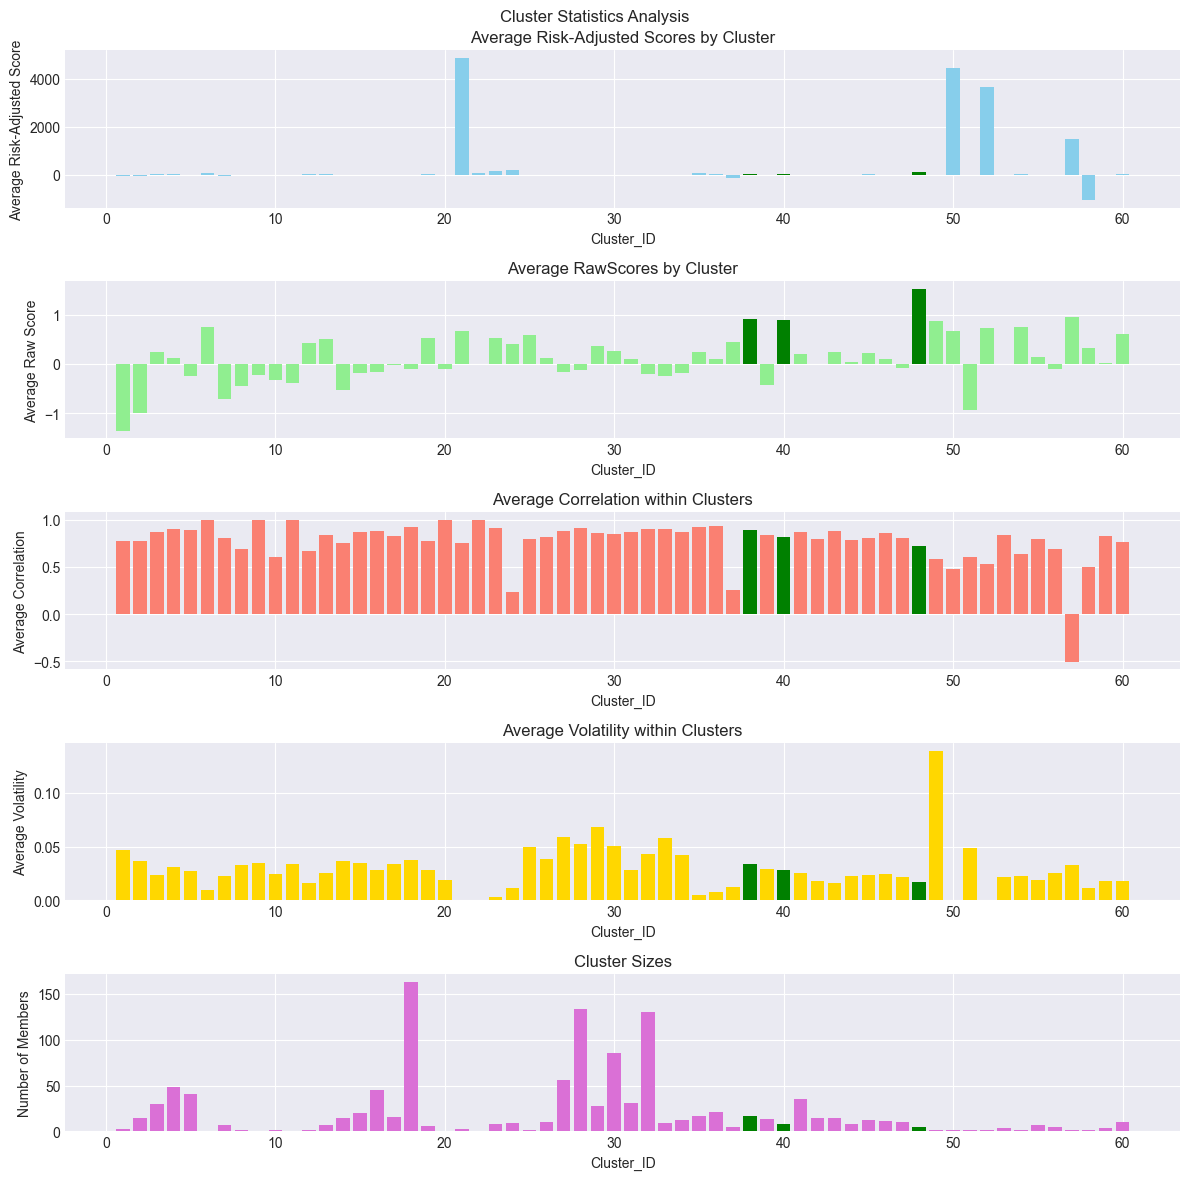

In [19]:
import matplotlib.pyplot as plt

PLOT_COLORS = ['lightgreen', 'skyblue', 'salmon', 'gold', 'orchid',
               'lightcoral', 'deepskyblue', 'mediumpurple', 'darkseagreen', 'tan']
HIGHLIGHT_COLOR = 'red'  # Color for highlighting selected clusters
HIGHLIGHT_COLOR = 'green'  # Color for highlighting selected clusters

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 12))
fig.suptitle('Cluster Statistics Analysis')

# Function to create bars with highlighted clusters
def create_bars(ax, x, y, color, highlight_ids):
    bars = ax.bar(x, y, color=[HIGHLIGHT_COLOR if cl_id in highlight_ids else color for cl_id in x])
    return bars

# Plot 1 Average Risk-Adjusted Score
create_bars(ax1, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'], 
            'skyblue', selected_cluster_ids)
ax1.set_title('Average Risk-Adjusted Scores by Cluster')
ax1.set_xlabel('Cluster_ID')
ax1.set_ylabel('Average Risk-Adjusted Score')

# Plot 2 Average Raw Score
create_bars(ax2, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'], 
            'lightgreen', selected_cluster_ids)
ax2.set_title('Average RawScores by Cluster')
ax2.set_xlabel('Cluster_ID')
ax2.set_ylabel('Average Raw Score')

# Plot 3: Average Correlation
create_bars(ax3, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_IntraCluster_Corr'], 
            'salmon', selected_cluster_ids)
ax3.set_title('Average Correlation within Clusters')
ax3.set_xlabel('Cluster_ID')
ax3.set_ylabel('Average Correlation')

# Plot 4: Average Volatility
create_bars(ax4, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Volatility'], 
            'gold', selected_cluster_ids)
ax4.set_title('Average Volatility within Clusters')
ax4.set_xlabel('Cluster_ID')
ax4.set_ylabel('Average Volatility')

# Plot 5 Cluster Size
create_bars(ax5, cluster_stats_df['Cluster_ID'], cluster_stats_df['Size'], 
            'orchid', selected_cluster_ids)
ax5.set_title('Cluster Sizes')
ax5.set_xlabel('Cluster_ID')
ax5.set_ylabel('Number of Members')

plt.tight_layout()
plt.show()

In [20]:
selected_stocks

,Cluster_ID,Ticker,Raw_Score,Risk_Adj_Score,Volatility,Price,"MktCap AUM, M",Cluster_Composite_Cluster_Score,Cluster_Avg_IntraCluster_Corr,Cluster_Avg_Volatility,Cluster_Avg_Raw_Score,Cluster_Avg_Risk_Adj_Score,Weight
303,38,FLOT,0.2722,57.9654,0.0047,50.6400,8810.0000,0.6740,0.8949,0.0337,0.9178,27.9803,0.0677
6,38,KGC,1.6199,47.5962,0.0340,13.0200,16020.0000,0.6740,0.8949,0.0337,0.9178,27.9803,0.0556
1,38,HMY,2.3957,44.4882,0.0539,14.6900,9140.0000,0.6740,0.8949,0.0337,0.9178,27.9803,0.0520
29,40,NOC,1.2058,55.1620,0.0219,512.3000,73840.0000,0.6742,0.8167,0.0283,0.8846,33.2084,0.0644
94,40,HCA,0.7632,42.0639,0.0181,338.5300,83350.0000,0.6742,0.8167,0.0283,0.8846,33.2084,0.0491
60,40,LMT,0.9331,41.3860,0.0225,462.2400,108800.0000,0.6742,0.8167,0.0283,0.8846,33.2084,0.0483
189,48,PAAA,0.4876,266.4956,0.0018,51.0400,3040.0000,1.1546,0.7228,0.0171,1.5306,137.5222,0.3113
239,48,JAAA,0.3954,153.4084,0.0026,50.3100,20150.0000,1.1546,0.7228,0.0171,1.5306,137.5222,0.1792
0,48,UNH,3.2766,147.5416,0.0222,578.5000,529160.0000,1.1546,0.7228,0.0171,1.5306,137.5222,0.1723


In [21]:
cluster_performance

,Cluster_ID,Size,Avg_IntraCluster_Corr,Avg_Raw_Score,Avg_Risk_Adj_Score,Avg_Volatility,Composite_Cluster_Score,Stocks_Selected,Intra_Cluster_Diversification
47,48,5,0.7228,1.5306,137.5222,0.0171,1.1546,3,0.2772
39,40,8,0.8167,0.8846,33.2084,0.0283,0.6742,3,0.1833
37,38,17,0.8949,0.9178,27.9803,0.0337,0.6740,3,0.1051


In [22]:
# Step 1: Drop Tickers 
drop_tickers = ['BECN']
selected_stocks = selected_stocks[~selected_stocks['Ticker'].isin(drop_tickers)].copy()

# Step 1: Drop Cluster 
drop_cluster = 0
selected_stocks = selected_stocks[selected_stocks['Cluster_ID'] != drop_cluster].copy()

# Step 2: Recalculate weights based on remaining stocks' Risk_Adj_Scores
selected_stocks['Weight'] = selected_stocks['Risk_Adj_Score'] / selected_stocks['Risk_Adj_Score'].sum()

# Step 3: Display the updated portfolio
print(f"\n=== UPDATED PORTFOLIO (CLUSTER {drop_cluster}, TICKER {drop_tickers} REMOVED) ===")
# sorted_selected_stocks_df = selected_stocks[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Weight', 'Volatility']] \
#               .sort_values(['Weight', 'Cluster_ID'], ascending=[False, False])
# Select columns, sort, and then set 'Ticker' as the index
sorted_selected_stocks_df = selected_stocks[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Weight', 'Volatility']] \
              .sort_values(['Weight', 'Cluster_ID'], ascending=[False, False]) \
              .set_index('Ticker')



print(sorted_selected_stocks_df.to_string(index=True))

# Step 4: Extract the 'Ticker' column from the sorted DataFrame
ticker_order = sorted_selected_stocks_df.index.tolist()


# Optional: Print weight redistribution summary
original_total = 1.0
new_total = selected_stocks['Weight'].sum()
print(f"\nWeights redistributed from Cluster {drop_cluster} & Ticker {drop_tickers}: {original_total - new_total:.1%}")
print(f"New total weights sum to: {new_total:.0%}")


=== UPDATED PORTFOLIO (CLUSTER 0, TICKER ['BECN'] REMOVED) ===
        Cluster_ID  Raw_Score  Risk_Adj_Score  Weight  Volatility
Ticker                                                           
PAAA            48     0.4876        266.4956  0.3113      0.0018
JAAA            48     0.3954        153.4084  0.1792      0.0026
UNH             48     3.2766        147.5416  0.1723      0.0222
FLOT            38     0.2722         57.9654  0.0677      0.0047
NOC             40     1.2058         55.1620  0.0644      0.0219
KGC             38     1.6199         47.5962  0.0556      0.0340
HMY             38     2.3957         44.4882  0.0520      0.0539
HCA             40     0.7632         42.0639  0.0491      0.0181
LMT             40     0.9331         41.3860  0.0483      0.0225

Weights redistributed from Cluster 0 & Ticker ['BECN']: 0.0%
New total weights sum to: 100%


In [23]:
sorted_selected_stocks_df

,Cluster_ID,Raw_Score,Risk_Adj_Score,Weight,Volatility
Ticker,,,,,
PAAA,48,0.4876,266.4956,0.3113,0.0018
JAAA,48,0.3954,153.4084,0.1792,0.0026
UNH,48,3.2766,147.5416,0.1723,0.0222
FLOT,38,0.2722,57.9654,0.0677,0.0047
NOC,40,1.2058,55.1620,0.0644,0.0219
KGC,38,1.6199,47.5962,0.0556,0.0340
HMY,38,2.3957,44.4882,0.0520,0.0539
HCA,40,0.7632,42.0639,0.0491,0.0181
LMT,40,0.9331,41.3860,0.0483,0.0225


In [24]:
final_selected_stocks = pd.concat([sorted_selected_stocks_df, df_data.loc[ticker_order]], axis=1)
final_selected_stocks

,Cluster_ID,Raw_Score,Risk_Adj_Score,Weight,Volatility,Company,Info,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PAAA,48,0.4876,266.4956,0.3113,0.0018,PGIM AAA CLO ETF,"Financial, Exchange Traded Fund, Bonds - Non G...",3040.0000,0.0400,44.1500,-0.3100,0.5516,-0.1600,-0.3700,-0.4100,0.0200,0.5200,-0.1900,-0.4500,-0.2800,-1.9600,1.1900,-1.9600,1.1900,0.2200,0.4310,0.8900,0.3500,2.8319,1.1600,2.4400,51.0400,0.2200,86.5232,4653.4302,415.5605,-0.4516,-0.6097,0.9232,-2.0083,-2.4347,0.7000,-0.0208,-0.0263,0.9962,-1.5077,-1.8395,0.7384,-0.5284,-0.6551,0.8857,0.8283,1.0753,1.2077,2.1027,2.8573,1.5845
JAAA,48,0.3954,153.4084,0.1792,0.0026,Janus Henderson AAA CLO ETF,"Financial, Exchange Traded Fund, Bonds - Non G...",20150.0000,0.0400,42.7900,-0.7900,0.5597,-0.4400,-0.5300,-0.8900,-0.7700,-0.5300,-0.2900,-0.7300,-0.8900,-1.4500,1.3300,-1.4500,1.3300,0.2100,0.4174,0.7200,0.3100,12.3859,8.1900,1.5100,50.3100,0.2600,29.3002,4653.4302,415.5605,0.1625,0.2729,1.0253,-1.5043,-2.0269,0.7715,-0.7275,-0.9691,0.8690,-2.0230,-2.5775,0.6591,-1.2474,-1.5898,0.7377,0.1072,0.1408,1.0251,1.2851,1.7442,1.3448
UNH,48,3.2766,147.5416,0.1723,0.0222,Unitedhealth Group Inc,"Healthcare, Healthcare Plans",529160.0000,0.4400,75.5400,14.3600,10.1800,10.5700,19.0200,12.4900,-0.8700,26.8600,11.5100,13.4000,5.7000,-1.1100,31.9300,-8.2800,32.5700,18.6500,3.2239,5.4000,2.6800,12.4802,5.0700,2.4600,578.5000,4.6000,137.7443,4653.4302,415.5605,7.1278,19.4696,3.3852,7.7936,21.5756,4.7932,6.4484,17.8111,3.9239,6.5777,14.9903,3.2931,0.8895,1.2138,1.1717,0.1768,0.2368,1.0319,0.9877,1.3911,1.1992
FLOT,38,0.2722,57.9654,0.0677,0.0047,iShares Floating Rate Bond ETF,"Financial, Exchange Traded Fund, Bonds - Broad...",8810.0000,0.0300,44.7500,-0.4700,1.0778,-0.5100,-0.5900,-0.5700,-0.4900,-0.5100,-0.4000,-0.5700,-0.5900,-1.3600,1.7900,-1.3600,1.7900,0.2300,0.4542,1.2800,0.3500,5.1321,1.9800,2.5900,50.6400,0.9400,5.7903,23.9191,3.1309,-1.6313,-2.2606,0.7584,-1.3964,-1.7804,0.7383,-1.0531,-1.3167,0.7630,-0.7747,-0.9527,0.7857,-0.4574,-0.5587,0.8418,0.2853,0.3526,1.1201,0.5161,0.6428,1.2022
NOC,40,1.2058,55.1620,0.0644,0.0219,Northrop Grumman Corp,"Industrials, Aerospace & Defense",73840.0000,0.1700,59.3500,9.1600,5.5157,0.0200,3.6800,13.2400,-4.0600,12.2600,2.6000,6.6600,4.7200,-2.4200,20.1900,-7.7900,22.3800,15.6200,3.0490,4.9700,2.7700,1.5871,1.0600,1.5000,512.3000,4.1300,35.6205,4653.4302,415.5605,-0.3141,-0.4635,0.9484,-0.1032,-0.1402,0.9784,2.4380,3.4194,1.6559,3.0686,4.5193,1.7487,1.1335,1.6183,1.2164,-0.2636,-0.3584,0.9551,0.5285,0.7779,1.1000
KGC,38,1.6199,47.5962,0.0556,0.0340,Kinross Gold Corp,"Basic Materials, Gold",16020.0000,0.6500,63.8800,40.4500,10.4326,1.3200,16.5600,31.5200,39.5500,103.4400,6.3100,11.4200,29.8600,0.9700,26.1600,0.9700,110.0000,0.6300,4.8387,7.9600,4.1900,24.8665,21.9100,1.1300,13.0200,8.8600,10.7705,531.9787,48.3924,1.9083,3.5183,1.4323,1.9428,3.3203,1.5138,2.0499,3.4630,1.5500,3.9174,6.5954,2.0989,2.1612,3.2026,1.4666,1.3516,2.0063,1.2658,1.8012,2.6820,1.3596
HMY,38,2.3957,44.4882,0.0520,0.0539,Harmony Gold Mining Co Ltd ADR,"Basic Materials, Gold",9140.0000,1.0500,64.5100,78.9300,13.0000,-2.8400,21.9100,73.8500,56.6100,64.5000,10.7400,21.2400,42.7000,-3.4800,51.6000,-3.4800,84.3200,0.8200,5.5820,8.5200,4.5800,11.5340,7.4100,1.5600,14.6900,13.2600,11.3293,4653.4302,415.5605,0.6742,1.1991,1.1469,3.8201,6.9759,2.0481,3.0448,5.5144,1.8972,4.9590,9.6638,2.7443,3.3039,5.5308,1.8333,1.4323,2.2356,1.2829,1

In [25]:
final_cluster_ids = final_selected_stocks['Cluster_ID'].unique().tolist()

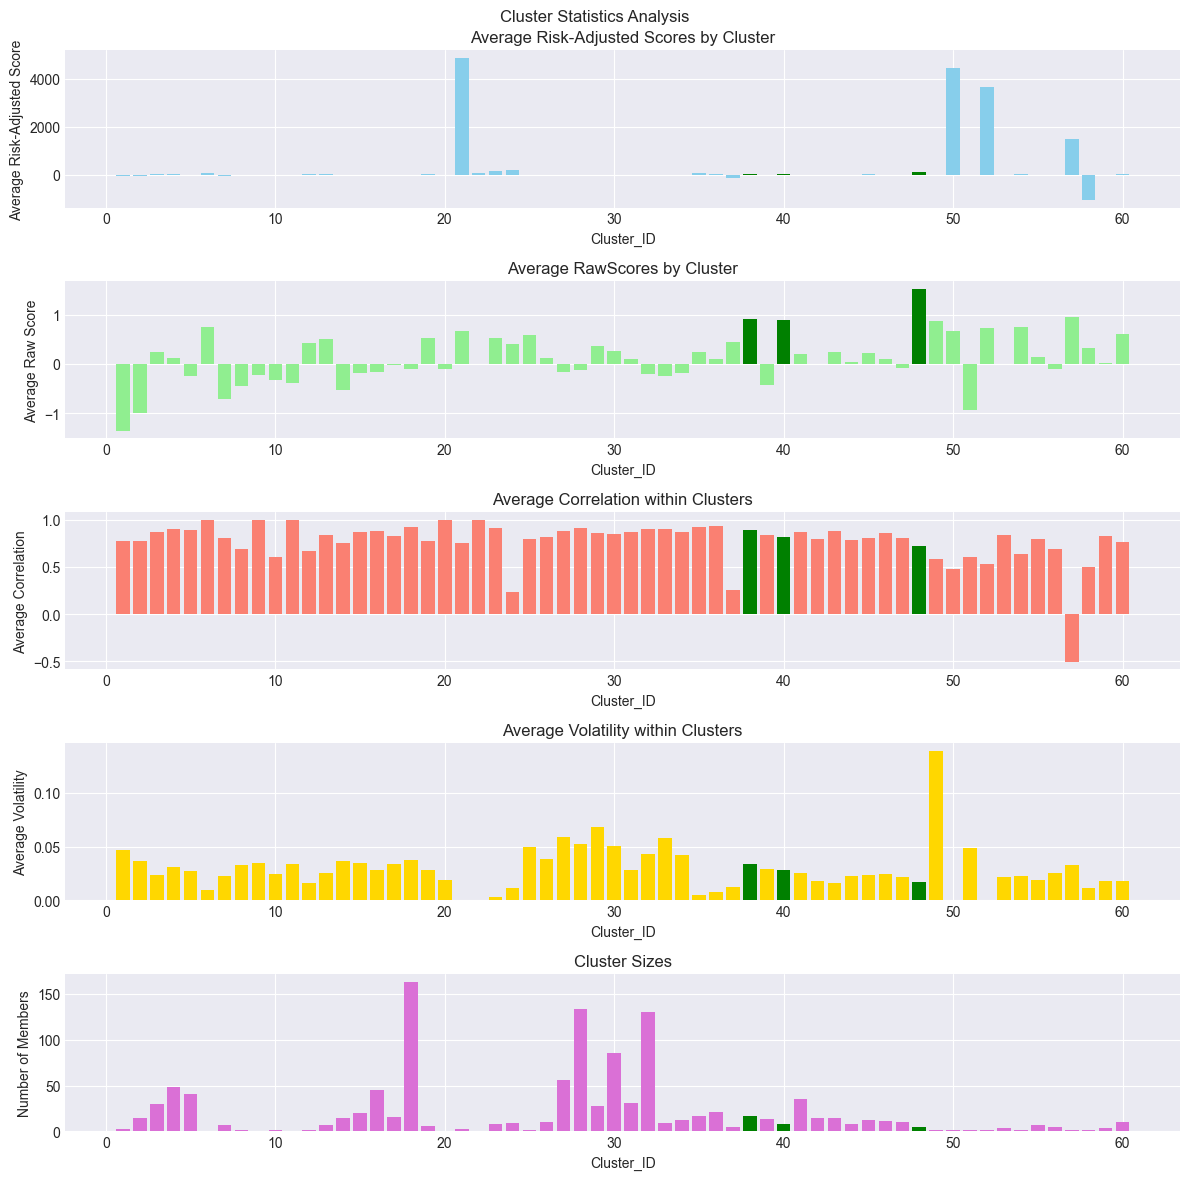

In [26]:
import matplotlib.pyplot as plt

PLOT_COLORS = ['lightgreen', 'skyblue', 'salmon', 'gold', 'orchid',
               'lightcoral', 'deepskyblue', 'mediumpurple', 'darkseagreen', 'tan']
HIGHLIGHT_COLOR = 'red'  # Color for highlighting selected clusters
HIGHLIGHT_COLOR = 'green'  # Color for highlighting selected clusters

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 12))
fig.suptitle('Cluster Statistics Analysis')

# Function to create bars with highlighted clusters
def create_bars(ax, x, y, color, highlight_ids):
    bars = ax.bar(x, y, color=[HIGHLIGHT_COLOR if cl_id in highlight_ids else color for cl_id in x])
    return bars

# Plot 1 Average Risk-Adjusted Score
create_bars(ax1, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'], 
            'skyblue', final_cluster_ids)
ax1.set_title('Average Risk-Adjusted Scores by Cluster')
ax1.set_xlabel('Cluster_ID')
ax1.set_ylabel('Average Risk-Adjusted Score')

# Plot 2 Average Raw Score
create_bars(ax2, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'], 
            'lightgreen', final_cluster_ids)
ax2.set_title('Average RawScores by Cluster')
ax2.set_xlabel('Cluster_ID')
ax2.set_ylabel('Average Raw Score')

# Plot 3: Average Correlation
create_bars(ax3, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_IntraCluster_Corr'], 
            'salmon', final_cluster_ids)
ax3.set_title('Average Correlation within Clusters')
ax3.set_xlabel('Cluster_ID')
ax3.set_ylabel('Average Correlation')

# Plot 4: Average Volatility
create_bars(ax4, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Volatility'], 
            'gold', final_cluster_ids)
ax4.set_title('Average Volatility within Clusters')
ax4.set_xlabel('Cluster_ID')
ax4.set_ylabel('Average Volatility')

# Plot 5 Cluster Size
create_bars(ax5, cluster_stats_df['Cluster_ID'], cluster_stats_df['Size'], 
            'orchid', final_cluster_ids)
ax5.set_title('Cluster Sizes')
ax5.set_xlabel('Cluster_ID')
ax5.set_ylabel('Number of Members')

plt.tight_layout()
plt.show()

In [27]:
output_filename_tsv = f"..\picks\{date_str}_selected_stocks.tsv"

final_selected_stocks.to_csv(output_filename_tsv, sep='\t', encoding='utf-8', index=True)

In [28]:
final_selected_stocks.to_parquet(f'..\picks\{date_str}_selected_stocks.parquet', engine='pyarrow', compression='zstd')
cluster_stats_df.to_parquet(f'..\picks\{date_str}_cluster_stats_df.parquet', engine='pyarrow', compression='zstd')

In [29]:
# Calculate summary statistics for cluster_stats_df
stats_summary = pd.DataFrame({
    'Count': cluster_stats_df.count(numeric_only=True),
    'Sum': cluster_stats_df.sum(numeric_only=True),
    'Mean': cluster_stats_df.mean(numeric_only=True),
    'Std': cluster_stats_df.std(numeric_only=True),
    'Mean+1Std (68%)': cluster_stats_df.mean(numeric_only=True) + cluster_stats_df.std(numeric_only=True),
    'Mean-1Std (68%)': cluster_stats_df.mean(numeric_only=True) - cluster_stats_df.std(numeric_only=True),
    'Mean+2Std (95%)': cluster_stats_df.mean(numeric_only=True) + 2*cluster_stats_df.std(numeric_only=True),
    'Mean-2Std (95%)': cluster_stats_df.mean(numeric_only=True) - 2*cluster_stats_df.std(numeric_only=True),
    'Min': cluster_stats_df.min(numeric_only=True),
    'Max': cluster_stats_df.max(numeric_only=True),
})

print("Summary Statistics for Cluster Data:")
display(stats_summary.round(4))

Summary Statistics for Cluster Data:


,Count,Sum,Mean,Std,Mean+1Std (68%),Mean-1Std (68%),Mean+2Std (95%),Mean-2Std (95%),Min,Max
Cluster_ID,60,1830.0000,30.5000,17.4642,47.9642,13.0358,65.4285,-4.4285,1.0000,60.0000
Size,60,1180.0000,19.6667,32.5168,52.1835,-12.8502,84.7003,-45.3670,1.0000,163.0000
Avg_IntraCluster_Corr,60,46.2763,0.7713,0.2308,1.0021,0.5405,1.2329,0.3097,-0.5103,1.0000
Avg_Raw_Score,60,7.4032,0.1234,0.5147,0.6381,-0.3913,1.1528,-0.9060,-1.3691,1.5306
Avg_Risk_Adj_Score,60,14237.3182,237.2886,987.1593,1224.4480,-749.8707,2211.6073,-1737.0301,-1060.8614,4888.0026
Avg_Volatility,60,1.7340,0.0289,0.0209,0.0498,0.0080,0.0708,-0.0130,0.0001,0.1388


In [30]:
# Sort by Avg_Raw_Score in descending order
sorted_by_Avg_Raw_Score = cluster_stats_df.sort_values('Avg_Raw_Score', ascending=False)
print(f'sorted_by_Avg_Raw_Score')
display(sorted_by_Avg_Raw_Score.head(10))

sorted_by_Avg_Raw_Score


,Cluster_ID,Size,Avg_IntraCluster_Corr,Avg_Raw_Score,Avg_Risk_Adj_Score,Avg_Volatility
47,48,5,0.7228,1.5306,137.5222,0.0171
56,57,2,-0.5103,0.9545,1496.9052,0.0328
37,38,17,0.8949,0.9178,27.9803,0.0337
39,40,8,0.8167,0.8846,33.2084,0.0283
48,49,2,0.5810,0.8791,6.5700,0.1388
53,54,2,0.6351,0.7589,34.8250,0.0229
5,6,1,1.0000,0.7546,76.5509,0.0099
51,52,2,0.5314,0.7252,3681.3484,0.0002
49,50,2,0.4779,0.6720,4463.6580,0.0002
20,21,3,0.7536,0.6633,4888.0026,0.0001


In [43]:
pd.set_option('display.max_rows', 200)

# --- Add this verification line ---
print(f"Use sorted_df_desc.head(200) to prevent truncation and see the top 200 rows\n")
# ---

sorted_df_desc = detailed_clusters_df.sort_values(by='Risk_Adj_Score', ascending=False)
print(sorted_df_desc.head(200))

Use sorted_df_desc.head(200) to prevent truncation and see the top 200 rows

     Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility    Price  MktCap AUM, M
103          50   SGOV     0.7420       7177.8432      0.0001 100.4400     41670.0000
97           21    SHV     0.7557       6188.5102      0.0001 110.2000     20540.0000
159          21    BIL     0.5553       5300.4646      0.0001  91.5100     45550.0000
116          52   TBIL     0.6721       4150.7604      0.0002  49.8900      5370.0000
90           52   BOXX     0.7783       3211.9363      0.0002 111.6000      5770.0000
115          21   GBIL     0.6787       3175.0329      0.0002  99.9500      6360.0000
215          57   USFR     0.4389       2971.3167      0.0001  50.3600     18720.0000
143          50   ICSH     0.6019       1749.4727      0.0003  50.5100      5690.0000
201           4   MINT     0.4667        969.4974      0.0005 100.2700     12740.0000
84           24   VGSH     0.8150        584.7904      0.0014  

In [32]:
pd.set_option('display.max_rows', 200)

print(detailed_clusters_df)

      Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility    Price  MktCap AUM, M
1117           1   XPEV    -0.8729        -16.9168      0.0516  17.4400     13540.0000
1174           1     LI    -1.4752        -34.0398      0.0433  21.1400     17430.0000
1177           1    NIO    -1.7594        -39.6922      0.0443   3.3100      6370.0000
882            2    TME    -0.3436         -7.9743      0.0431  12.6400      8840.0000
1049           2    FXI    -0.5971        -16.5522      0.0361  31.6800      6070.0000
...          ...    ...        ...             ...         ...      ...            ...
139           60     PM     0.6113         26.7593      0.0228 151.8000    236030.0000
237           60     MO     0.3993         25.4157      0.0157  56.3600     95040.0000
218           60     KR     0.4345         20.5968      0.0211  65.8300     43510.0000
344           60    CME     0.2240         13.9185      0.0161 254.1300     91580.0000
386           60    DUK     0.1681         

In [33]:
# Check if 'GLD' is present in df_cov
has_ticker_cov = 'GLD' in df_cov.index and 'GLD' in df_cov.columns

print(f"Is 'GLD' present in covariance matrix? {has_ticker_cov}")

if has_ticker_cov:
  # Print covariance for GLD vs itself (variance) if exists
  print(f"\nVariance for GLD: {df_cov.loc['GLD', 'GLD']}")

Is 'GLD' present in covariance matrix? True

Variance for GLD: 0.00021523972899523738


In [34]:
# Check if 'GLD' is present in df_corr
has_ticker_cov = 'GLD' in df_corr.index and 'GLD' in df_corr.columns

print(f"Is 'GLD' present in covariance matrix? {has_ticker_cov}")

if has_ticker_cov:
  # Print covariance for GLD vs itself (variance) if exists
  print(f"\nVariance for GLD: {df_corr.loc['GLD', 'GLD']}")

Is 'GLD' present in covariance matrix? True

Variance for GLD: 1.0


In [35]:
zscore_df.loc['GLD']

weighted_sharpe                        0.3001
weighted_sortino                       0.4095
weighted_omega                         0.3120
weighted_momentum                      0.1021
weighted_sma                           0.2221
weighted_volatility                    0.1383
weighted_rsi                           0.0000
sharpe_zscores_Sharpe 3d               0.0365
sharpe_zscores_Sharpe 5d               0.2097
sharpe_zscores_Sharpe 10d              1.4783
sharpe_zscores_Sharpe 15d              1.4111
sharpe_zscores_Sharpe 30d              2.9865
sharpe_zscores_Sharpe 60d              2.8809
sortino_zscores_Sortino 3d             2.8202
sortino_zscores_Sortino 5d            -0.1163
sortino_zscores_Sortino 10d            1.5484
sortino_zscores_Sortino 15d            1.4475
sortino_zscores_Sortino 30d            3.3218
sortino_zscores_Sortino 60d            3.2640
omega_zscores_Omega 3d                 2.8202
omega_zscores_Omega 5d                -0.1594
omega_zscores_Omega 10d           

In [36]:
logging.shutdown()